# Microsoft Malware Detection

# 1.Importing libraries

In [ ]:
import matplotlib
matplotlib.get_backend()

'module://ipykernel.pylab.backend_inline'

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import shutil
import os
import pandas as pd
import matplotlib
# matplotlib.use('agg')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# import pickle
from sklearn.manifold import TSNE
# from sklearn import preprocessing
import pandas as pd
# from multiprocessing import Process# this is used for multithreading
# import multiprocessing
import codecs# this is used for file operations 
import random as r
from xgboost import XGBClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV
# from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


!ls
# import pickle

# from sklearn.preprocessing import normalize
# import dask.dataframe as dd
import array

from IPython import display
import matplotlib.pyplot as plt
# import cv2
from google.colab import drive
drive.mount('/content/drive/')
# from multiprocessing import Process # this is used for multithreading
# import multiprocessing

# 2.Kaggle data download

In [ ]:
!pip install kaggle
from google.colab import files
from datetime import datetime
api_token = files.upload()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Saving kaggle.json to kaggle.json


In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle competitions download -c "malware-classification"
# !kaggle competitions download -c 'malware-classification'

100% 35.3G/35.3G [04:39<00:00, 170MB/s]
100% 35.3G/35.3G [04:40<00:00, 135MB/s]


In [ ]:
# !rm malware-classification.zip

# 3.Unzip the data

In [ ]:
# importing required modules
from zipfile import ZipFile
  
# specifying the zip file name
file_name = "malware-classification.zip"
  
# opening the zip file in READ mode
with ZipFile(file_name, 'r') as zip:
    # printing all the contents of the zip file
    zip.printdir()
    
    zip.extract("train.7z")
    # zip.extract("trainLabels.csv")
    data=!7z l train.7z
    print(len(data))
    print(type(data))
    print('Done!')
!rm malware-classification.zip

File Name                                             Modified             Size
dataSample.7z                                  2019-12-15 22:50:10      4261914
sampleSubmission.csv                           2019-12-15 22:50:12      2109493
test.7z                                        2019-12-15 22:55:30  19076975041
train.7z                                       2019-12-15 23:34:44  18810691091
trainLabels.csv                                2019-12-16 00:11:04       271713
21759
<class 'IPython.utils.text.SList'>
Done!


In [ ]:
!ls -lh

total 18G
drwx------ 5 root root 4.0K Mar 23 15:01 drive
-rw-r--r-- 1 root root   69 Mar 23 14:50 kaggle.json
drwxr-xr-x 1 root root 4.0K Mar 21 22:54 sample_data
-rw-r--r-- 1 root root  18G Mar 23 14:57 train.7z


# 4.Get filenames

In [ ]:
# Storing the filenames for byte files and asm files separately
byte_file_list=[]
asm_file_list=[]
for i in data:
  if (i.endswith("bytes")):
    byte_file_list.append(i)
  elif (i.endswith("asm")):
    asm_file_list.append(i)

In [ ]:
print('Number of Byte files',len(byte_file_list))

Number of Byte files 10868


In [ ]:
print('Number of ASM files',len(asm_file_list))

Number of ASM files 10868


## 4.1 Bytefiles names

In [ ]:
byte_file_list[0]

'2015-01-29 05:00:00 ....A      5256192               train/01azqd4InC7m9JpocGv5.bytes'

In [ ]:
# # Removing extra character and to get only the file name. For ex:
# 2015-01-29 05:00:00 ....A     58961309    174379443  train/01azqd4InC7m9JpocGv5.asm
byte_file_name=[]
for i in range(0,len(byte_file_list)):
  byte_file_name.append(byte_file_list[i].split()[-1].replace('train/', ''))

In [ ]:
byte_file_name[0]

'01azqd4InC7m9JpocGv5.bytes'

## 4.2 ASM filenames

In [ ]:
asm_file_list[0]

'2015-01-29 05:00:00 ....A     58961309    174379443  train/01azqd4InC7m9JpocGv5.asm'

In [ ]:
# # Removing extra character and to get only the file name. For ex:
# 2015-01-29 05:00:00 ....A     58961309    174379443  train/01azqd4InC7m9JpocGv5.asm
asm_file_name=[]
for i in range(0,len(asm_file_list)):
  asm_file_name.append(asm_file_list[i].split()[-1].replace('train/', ''))

In [ ]:
asm_file_name[:3]

['01azqd4InC7m9JpocGv5.asm',
 '01IsoiSMh5gxyDYTl4CB.asm',
 '01jsnpXSAlgw6aPeDxrU.asm']

# 5.Sample data extraction

In [ ]:
!mkdir bytefiles

In [ ]:
#To download all the byte files from train.7z and below code will take almost 15mins.
start=datetime.now()

!7z e train.7z -o/content/bytefiles *.bytes -r

end=datetime.now()
difference=end-start
print('Time taken to extract all the byte files',difference)

In [ ]:
!ls -lh

total 18G
drwxr-xr-x 2 root root 564K Dec 27 07:54 bytefiles
-rw-r--r-- 1 root root   69 Dec 27 07:32 kaggle.json
drwxr-xr-x 1 root root 4.0K Dec 20 20:19 sample_data
-rw-r--r-- 1 root root  18G Dec 27 07:39 train.7z
-rw-r--r-- 1 root root 266K Dec 27 07:39 trainLabels.csv


In [ ]:
print('Number of byte files extracted is',len(os.listdir('bytefiles/')))

Number of byte files extracted is 10868


# 6.Directory Size

In [ ]:
#https://www.thepythoncode.com/article/get-directory-size-in-bytes-using-python

def get_directory_size(directory):
    """Returns the `directory` size in bytes."""
    total = 0
    try:
        # print("[+] Getting the size of", directory)
        for entry in os.scandir(directory):
            if entry.is_file():
                # if it's a file, use stat() function
                total += entry.stat().st_size
            elif entry.is_dir():
                # if it's a directory, recursively call this function
                total += get_directory_size(entry.path)
    except NotADirectoryError:
        # if `directory` isn't a directory, get the file size then
        return os.path.getsize(directory)
    except PermissionError:
        # if for whatever reason we can't open the folder, return 0
        return 0
    return total

In [ ]:
def get_size_format(b, factor=1024, suffix="B"):
    """
    Scale bytes to its proper byte format
    e.g:
        1253656 => '1.20MB'
        1253656678 => '1.17GB'
    """
    for unit in ["", "K", "M", "G", "T", "P", "E", "Z"]:
        if b < factor:
            return f"{b:.2f}{unit}{suffix}"
        b /= factor
    return f"{b:.2f}Y{suffix}"

In [ ]:
get_size_format(get_directory_size("bytefiles/"))

'47.36GB'

# 7.Byte files

## 7.1.Functions for n-grams features

In [ ]:
def ngrams(line,n):
  '''
  Return all possible ngrams for a given line/sentence already split by whatever the criteria is
  For ex: "This is a dog"
  Input to this function should be:(['This','is','a','dog'],2)
  Output : ['This is','is a', 'a dog']
  '''
  t = []
  for i in range(len(line)-n+1):
    t.append(" ".join(line[i:i+n]))    # Creating n-grams
  
  return t

In [ ]:
# In the following lines of code we will store all the possible unigram and bigram features possible by reading the files.

files = os.listdir('bytefiles')

# Defining two sets to store all the uni-gram and bi-gram features
unigram_features = set()
bigram_features = set()

# iterating through all the files
for file in tqdm(files):

  if file.endswith('txt'):
    
    # Opening the text file
    with open('bytefiles/'+file,"r") as byte_file:
      
      # iterating throgh all the lines of the text file
      for line in byte_file:

        # Splitting a particular line
        line = line.rstrip().split(" ")
        
        # Adding all the features to the set using the update function i.e already existing features will 
        # be already there and the new features will be added
        unigram_features.update(line)

        # using ngram function created to obtain all possible combinations of n-grams possible and updating out set
        bigram_features.update(ngrams(line,n=2))
    
    byte_file.close()

 55%|█████▌    | 6011/10868 [1:09:49<56:25,  1.43it/s]


KeyboardInterrupt: ignored

In [ ]:
# We had by stopped the extraction of the uni-grams and bi-grams. Continuing from 6009 onwards. 
# It doesn't matter if we count any feature twice, we need a unique list of uni-grams and bi-grams afterall 

# iterating through all the files
for file in tqdm(files[6009:]):

  if file.endswith('txt'):

    # Opening the text file containing the byte features
    with open('bytefiles/'+file,"r") as byte_file:

      # iterating throgh all the lines of the text file
      for line in byte_file:
        
        # Splitting a particular line
        line = line.rstrip().split(" ")
        
        # Adding all the features to the set using the update function i.e already existing features will 
        # be already there and the new features will be added
        unigram_features.update(line)

        # using ngram function created to obtain all possible combinations of n-grams possible and updating out set
        bigram_features.update(ngrams(line,n=2))
    byte_file.close()

100%|██████████| 4859/4859 [55:22<00:00,  1.46it/s]


In [ ]:
# The number of unigram and bigram features in total are:
print(len(unigram_features),len(bigram_features))

257 65775


## 7.2.Save features

In [ ]:
# saving the unigram features as text files
file_= open('/content/drive/MyDrive/MicrosoftMalware/unigrams.txt','w+')
file_.write(','.join(unigram_features))
file_.close()

In [ ]:
# saving the bigram features as text files
file_=open('/content/drive/MyDrive/MicrosoftMalware/bigrams.txt','w+')
for bf in tqdm(bigram_features):
  file_.write(bf+'\n')
file_.close()

100%|██████████| 65775/65775 [00:00<00:00, 885952.67it/s]


In [ ]:
# Read the unigram features from the text file saved earlier
unigrams = pd.read_table("/content/drive/MyDrive/MicrosoftMalware/unigrams.txt")
unigrams=unigrams.columns.values[0].split(',')
len(unigrams)

257

In [ ]:
# Read the bi-gram features from the text file saved earlier
bigrams = pd.read_table("/content/drive/MyDrive/MicrosoftMalware/bigrams.txt",names=['bi_g'])
bigrams.head()

,bi_g
0,D6 EC
1,9A 75
2,53 6D
3,10 F0
4,36 97


In [ ]:
bigrams = bigrams['bi_g'].values
print(bigrams[:5])
len(bigrams)

['D6 EC' '9A 75' '53 6D' '10 F0' '36 97']


65775

In [ ]:
# Converting features as lists
unigram_features=list(unigram_features)
bigram_features=list(bigram_features)

'B8'

In [ ]:
bigram_features[0]

'D6 EC'

In [ ]:
# Creating the first row or the header
byte_feature_file=open('/content/drive/MyDrive/MicrosoftMalware/countvectorizer.txt','w+')

# The first column should be ID
byte_feature_file.write("ID,")

# Adding all the other features
for i,f in enumerate(features):
  if i!=len(features)-1:
    byte_feature_file.write(f+',')
  else:
    byte_feature_file.write(f+'\n')
byte_feature_file.close()

In [ ]:
!ls -lh

total 1.1M
drwxr-xr-x 2 root root 792K Dec 27 08:32 bytefiles
drwx------ 5 root root 4.0K Dec 27 08:47 drive
-rw-r--r-- 1 root root   69 Dec 27 07:32 kaggle.json
drwxr-xr-x 1 root root 4.0K Dec 20 20:19 sample_data
-rw-r--r-- 1 root root 266K Dec 27 07:39 trainLabels.csv


## 7.3.Analysis of bytefile features

In [ ]:
# Read the unigram features from the text file saved earlier
unigrams = pd.read_csv("/content/drive/MyDrive/AAIC_Assignments/MicrosoftMalware/unigrams.txt")
unigrams=unigrams.columns.values
len(unigrams)
# unigrams.head()

257

In [ ]:
# Read the bi-gram features from the text file saved earlier
bigram_features = pd.read_table("/content/drive/MyDrive/AAIC_Assignments/MicrosoftMalware/bigrams.txt",names=['bi_g'])
bigram_features.head()

,bi_g
0,D6 EC
1,9A 75
2,53 6D
3,10 F0
4,36 97


In [ ]:
bigram_features = bigram_features['bi_g'].values
print(bigram_features[:5])
len(bigram_features)

['D6 EC' '9A 75' '53 6D' '10 F0' '36 97']


65775

In [ ]:
modified_unigrams = list(unigrams)
modified_unigrams.remove('??')
modified_unigrams = np.array(modified_unigrams)
modified_unigrams.sort()
modified_unigrams

array(['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '0A',
       '0B', '0C', '0D', '0E', '0F', '10', '11', '12', '13', '14', '15',
       '16', '17', '18', '19', '1A', '1B', '1C', '1D', '1E', '1F', '20',
       '21', '22', '23', '24', '25', '26', '27', '28', '29', '2A', '2B',
       '2C', '2D', '2E', '2F', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '3A', '3B', '3C', '3D', '3E', '3F', '40', '41',
       '42', '43', '44', '45', '46', '47', '48', '49', '4A', '4B', '4C',
       '4D', '4E', '4F', '50', '51', '52', '53', '54', '55', '56', '57',
       '58', '59', '5A', '5B', '5C', '5D', '5E', '5F', '60', '61', '62',
       '63', '64', '65', '66', '67', '68', '69', '6A', '6B', '6C', '6D',
       '6E', '6F', '70', '71', '72', '73', '74', '75', '76', '77', '78',
       '79', '7A', '7B', '7C', '7D', '7E', '7F', '80', '81', '82', '83',
       '84', '85', '86', '87', '88', '89', '8A', '8B', '8C', '8D', '8E',
       '8F', '90', '91', '92', '93', '94', '95', '9

In [ ]:
extra_features = []
for values in np.sort(bigram_features):
  val = values.split(' ')
  w1,w2 = val[0], val[1]
  if w1 not in modified_unigrams or w2 not in modified_unigrams:
    extra_features.append(values)
    print(values)
print("Done")

In [ ]:
# Extra features
# 00 ??
# 01 ??
# 02 ??
# 03 ??
# 04 ??
# 05 ??
# 06 ??
# 07 ??
# 08 ??

In [ ]:
# Converting features as lists
unigram_features=list(unigram_features)
bigram_features=list(bigram_features)

'B8'

## 7.4.Extract bi-grams and unigrams features


In [ ]:
# Creating a unique feature list containing the unigram and bigram features
features = bigram_features.copy()

In [ ]:
# Create different directories to store the bytefiles
import shutil
import random as r
#intially create four folders
#first 
#second
#third
#fourth

#this code tells us about random split of files into five folders
folder_1 ='first'
folder_2 ='second'
folder_3 ='third'
folder_4 ='fourth'


for i in [folder_1,folder_2,folder_3,folder_4]:
    if not os.path.isdir(i):
        os.makedirs(i)

source='bytefiles/'
files = os.listdir('bytefiles')

data=list(range(0,10868))
r.shuffle(data)
count=0
for i in range(0,10868):
    if i % 4==0:
        shutil.move(source+files[data[i]],'first')
    elif i%4==1:
        shutil.move(source+files[data[i]],'second')
    elif i%4 ==2:
        shutil.move(source+files[data[i]],'third')
    elif i%4 ==3:
        shutil.move(source+files[data[i]],'fourth')

In [ ]:
# List all the filenames in the directories
first_byte_list = os.listdir('first')
second_byte_list = os.listdir('second')
third_byte_list = os.listdir('third')
fourth_byte_list = os.listdir('fourth')

all_files = first_byte_list+second_byte_list+third_byte_list +fourth_byte_list

In [ ]:
pickle.dump((first_byte_list, second_byte_list, third_byte_list, fourth_byte_list), open('/content/drive/MyDrive/AAIC_Assignments/MM_DATA/byte_files_lists.pkl','wb'))

In [ ]:
# get all the features
bigram_features = np.sort(bigram_features)
bigram_features = list(bigram_features)
bigram_features[:5]

['00 00', '00 01', '00 02', '00 03', '00 04']

In [ ]:
# Columns names for the files to be written
columns = ['ID'] + bigrams
columns[:5]

['ID', '00 00', '00 01', '00 02', '00 03']

In [ ]:
cores = multiprocessing.cpu_count() # Count the number of cores in a computer
cores

2

Idea:
* We have split the data into 4 folders
* Now we are going to find the features in these four folders separately using multiprocessing and save it into 4 different csv files.
* We are going to do this in two steps rather than use 4 multiprocessing tasks at one step. As the number of cores is 2 in colab using 2 processes parallely
* will be more efficient than trying to use 4 processes simultaneously. 
* After that we are going to merge all the countvectorizer files into one csv file and use it further for out task.

In [ ]:
#http://flint.cs.yale.edu/cs421/papers/x86-asm/asm.html

def firstprocess():
        # program to convert into bag of words of bytefiles
        # this is custom-built bag of words

    files = os.listdir('first')


    # ******************** Creating the first row or the header ********************

    # Write the first line of the csv file which is the header and the first one will be the ID

    byte_feature_file=open('/content/drive/MyDrive/AAIC_Assignments/MM_DATA/bigrams_1.csv','a')
    byte_feature_file.write(','.join(columns))
    byte_feature_file.write('\n')
    byte_feature_file.close()
    # ********************** Creation of header finished ***************************

    # **************** Implementing count of bigrams ******************

    for file in tqdm(files):
        
        # Create just a row vector(as a dictionay, faster to write than a np array) to store the count
        feature_matrix = {x:0 for x in bigram_features}              

        if(file.endswith("bytes")):

            with open('first/'+file,"r") as byte_file:
                
                for lines in byte_file:
                    # print(lines)
                    # break
                    # Get unigrams and bigrams for this particular line and count it. Then add the counts to the respective columns                
                    
                    line=lines.rstrip().split(" ")     # This contains all possible unigrams( there can be duplicates in this)
                    line = line[1:]                    # Removing the address
                    bigrams = set(ngrams(line,n=2))         # Get all possible bigrams for a particular line in the text file
                                    
                    # Iterating over bigrams for a particular line
                    for hex_code in bigrams:
                      try:
                        feature_matrix[hex_code] += lines.count(hex_code)
                      except Exception as e:
                        # Actually not required, was testing if there was any errors
                        # error_log_file.write(file," , ",e,'\n')
                        # count_error += 1
                        print("error",e)
        
        byte_feature_file=open('/content/drive/MyDrive/AAIC_Assignments/MM_DATA/bigrams_1.csv','a')
        
        # writing the filename to be stored as ID
        byte_feature_file.write(file+",")

        # Write/save the values calculated for a particular byte file0
        for i, row in enumerate(feature_matrix.values()):
            if i!=len(feature_matrix.values())-1:
                byte_feature_file.write(str(row)+",")
            else:
                byte_feature_file.write(str(row))
        byte_feature_file.write("\n")

        byte_feature_file.close()

    # error_log_file.close()

def secondprocess():
        # program to convert into bag of words of bytefiles
        # this is custom-built bag of words

    files = os.listdir('second')


    # ******************** Creating the first row or the header ********************

    # Write the first line of the csv file which is the header and the first one will be the ID

    byte_feature_file=open('/content/drive/MyDrive/AAIC_Assignments/MM_DATA/bigrams_2.csv','a')
    byte_feature_file.write(','.join(columns))
    byte_feature_file.write('\n')
    byte_feature_file.close()
    # ********************** Creation of header finished ***************************

    # **************** Implementing count of bigrams ******************

    for file in tqdm(files):
        
        # Create just a row vector(as a dictionay, faster to write than a np array) to store the count
        feature_matrix = {x:0 for x in bigram_features}              

        if(file.endswith("bytes")):

            with open('second/'+file,"r") as byte_file:
                
                for lines in byte_file:
                    # print(lines)
                    # break
                    # Get unigrams and bigrams for this particular line and count it. Then add the counts to the respective columns                
                    
                    line=lines.rstrip().split(" ")     # This contains all possible unigrams( there can be duplicates in this)
                    line = line[1:]                    # Removing the address
                    bigrams = set(ngrams(line,n=2))         # Get all possible bigrams for a particular line in the text file
                                    
                    # Iterating over bigrams for a particular line
                    for hex_code in bigrams:
                      try:
                        feature_matrix[hex_code] += lines.count(hex_code)
                      except Exception as e:
                        # Actually not required, was testing if there was any errors
                        # error_log_file.write(file," , ",e,'\n')
                        # count_error += 1
                        print("error",e)
        
        byte_feature_file=open('/content/drive/MyDrive/AAIC_Assignments/MM_DATA/bigrams_2.csv','a')
        
        # writing the filename to be stored as ID
        byte_feature_file.write(file+",")

        # Write/save the values calculated for a particular byte file0
        for i, row in enumerate(feature_matrix.values()):
            if i!=len(feature_matrix.values())-1:
                byte_feature_file.write(str(row)+",")
            else:
                byte_feature_file.write(str(row))
        byte_feature_file.write("\n")

        byte_feature_file.close()



def main():
    #the below code is used for multiprogramming
    #the number of process depends upon the number of cores present System
    #process is used to call multiprogramming
    manager=multiprocessing.Manager() 	
    p1=Process(target=firstprocess)
    p2=Process(target=secondprocess)

    #p1.start() is used to start the thread execution
    p1.start()
    p2.start()

    #After completion all the threads are joined
    p1.join()
    p2.join()

if __name__=="__main__":
    main()

100%|██████████| 2717/2717 [1:36:31<00:00,  2.13s/it]


In [ ]:

#http://flint.cs.yale.edu/cs421/papers/x86-asm/asm.html

def thirdprocess():
        # program to convert into bag of words of bytefiles
        # this is custom-built bag of words

    files = os.listdir('third')


    # ******************** Creating the first row or the header ********************

    # Write the first line of the csv file which is the header and the first one will be the ID

    byte_feature_file=open('/content/drive/MyDrive/AAIC_Assignments/MM_DATA/bigrams_3.csv','a')
    byte_feature_file.write(','.join(columns))
    byte_feature_file.write('\n')
    byte_feature_file.close()
    # ********************** Creation of header finished ***************************

    # **************** Implementing count of bigrams ******************

    for file in tqdm(files):
        
        # Create just a row vector(as a dictionay, faster to write than a np array) to store the count
        feature_matrix = {x:0 for x in bigram_features}              

        if(file.endswith("bytes")):

            with open('third/'+file,"r") as byte_file:
                
                for lines in byte_file:
                    # print(lines)
                    # break
                    # Get unigrams and bigrams for this particular line and count it. Then add the counts to the respective columns                
                    
                    line=lines.rstrip().split(" ")     # This contains all possible unigrams( there can be duplicates in this)
                    line = line[1:]                    # Removing the address
                    bigrams = set(ngrams(line,n=2))         # Get all possible bigrams for a particular line in the text file
                                    
                    # Iterating over bigrams for a particular line
                    for hex_code in bigrams:
                      try:
                        feature_matrix[hex_code] += lines.count(hex_code)
                      except Exception as e:
                        # Actually not required, was testing if there was any errors
                        # error_log_file.write(file," , ",e,'\n')
                        # count_error += 1
                        print("error",e)
        
        byte_feature_file=open('/content/drive/MyDrive/AAIC_Assignments/MM_DATA/bigrams_3.csv','a')
        
        # writing the filename to be stored as ID
        byte_feature_file.write(file+",")

        # Write/save the values calculated for a particular byte file0
        for i, row in enumerate(feature_matrix.values()):
            if i!=len(feature_matrix.values())-1:
                byte_feature_file.write(str(row)+",")
            else:
                byte_feature_file.write(str(row))
        byte_feature_file.write("\n")

        byte_feature_file.close()

    # error_log_file.close()

def fourthprocess():
        # program to convert into bag of words of bytefiles
        # this is custom-built bag of words

    files = os.listdir('fourth')


    # ******************** Creating the first row or the header ********************


    # Write the first line of the csv file which is the header and the first one will be the ID

    byte_feature_file=open('/content/drive/MyDrive/AAIC_Assignments/MM_DATA/bigrams_4.csv','a')
    byte_feature_file.write(','.join(columns))
    byte_feature_file.write('\n')
    byte_feature_file.close()
    # ********************** Creation of header finished ***************************


    for file in tqdm(files):
        
        # Create just a row vector(as a dictionay, faster to write than a np array) to store the count
        feature_matrix = {x:0 for x in bigram_features}              

        if(file.endswith("bytes")):

            with open('fourth/'+file,"r") as byte_file:
                
                for lines in byte_file:
                    # print(lines)
                    # break
                    # Get unigrams and bigrams for this particular line and count it. Then add the counts to the respective columns                
                    
                    line=lines.rstrip().split(" ")     # This contains all possible unigrams( there can be duplicates in this)
                    line = line[1:]                    # Removing the address
                    bigrams = set(ngrams(line,n=2))         # Get all possible bigrams for a particular line in the text file
                                    
                    # Iterating over bigrams for a particular line
                    for hex_code in bigrams:
                      try:
                        feature_matrix[hex_code] += lines.count(hex_code)
                      except Exception as e:
                        # Actually not required, was testing if there was any errors
                        # error_log_file.write(file," , ",e,'\n')
                        # count_error += 1
                        print("error",e)
        
        byte_feature_file=open('/content/drive/MyDrive/AAIC_Assignments/MM_DATA/bigrams_4.csv','a')
        
        # writing the filename to be stored as ID
        byte_feature_file.write(file+",")

        # Write/save the values calculated for a particular byte file0
        for i, row in enumerate(feature_matrix.values()):
            if i!=len(feature_matrix.values())-1:
                byte_feature_file.write(str(row)+",")
            else:
                byte_feature_file.write(str(row))
        byte_feature_file.write("\n")

        byte_feature_file.close()



def main():
    #the below code is used for multiprogramming
    #the number of process depends upon the number of cores present System
    #process is used to call multiprogramming
    manager=multiprocessing.Manager() 	
    p3=Process(target=thirdprocess)
    p4=Process(target=fourthprocess)

    #p1.start() is used to start the thread execution
    p3.start()
    p4.start()

    #After completion all the threads are joined
    p3.join()
    p4.join()

if __name__=="__main__":
    main()

100%|██████████| 2717/2717 [1:36:17<00:00,  2.13s/it]


In [ ]:
# Lets check if all the file ids are extracted or not
byte_ids_1 = pd.read_csv('/content/drive/MyDrive/AAIC_Assignments/MM_DATA/bigrams_1.csv',usecols=[0])
byte_ids_2 = pd.read_csv('/content/drive/MyDrive/AAIC_Assignments/MM_DATA/bigrams_2.csv',usecols=[0])
byte_ids_3 = pd.read_csv('/content/drive/MyDrive/AAIC_Assignments/MM_DATA/bigrams_3.csv',usecols=[0])
byte_ids_4 = pd.read_csv('/content/drive/MyDrive/AAIC_Assignments/MM_DATA/bigrams_4.csv',usecols=[0])


In [ ]:
all_byte_files_ = list(byte_ids_1['ID'].values)+list(byte_ids_2['ID'].values)+list(byte_ids_3['ID'].values)+list(byte_ids_4['ID'].values)


In [ ]:
# Checks: We are going to perform two way checks: 
# if all the names of the byte files extracted are present in the byte_files_names list
# second: the other way round of the above 

# Check 1
for name in all_byte_files_:
  if name not in byte_file_name:
    print(name)
print("Check 1 finished!")

for name in byte_file_name:
  if name not in all_byte_files_:
    print(name)
print("Check 2 finished!")

Check 1 finished!
Check 2 finished!


## 7.5.Combine dataframes

Reading as pandas data frame and merging is not going to work here due to large size of the files. We are going to use custom file writing to concat the extracted features. 

In [ ]:
files = ["/content/drive/MyDrive/AAIC_Assignments/MM_DATA/bigrams_"+str(i)+".csv" for i in range(1,5)]
# for files in 

for i,file_ in tqdm(enumerate(files)):

    concat_df=open('/content/drive/MyDrive/AAIC_Assignments/MM_DATA/concat_bigrams.csv','a')      
    
    # We want write 
    with open(file_,'r') as f:
      line_cnt = 0  # This keeps track of the line number in the file
      
      # iterating over all the lines in the file. 
      for line in f:
        # For the first dataframe we want to write the header and all the other lines too
        # But for the other dataframes we want to write the values only and no column names
        # For this we are putting two conditions: 1. check if its the first dataframe: if yes write all the lines
        # 2. If its not the 1st dataframe: write all lines except for the first one. 
        # For this we are using the line_count variable to track the line number 
        if i==0:
          concat_df.write(line)
        else:
          if line_cnt>0:
            concat_df.write(line)
        
        line_cnt += 1 

      concat_df.close()

4it [00:33,  8.31s/it]


## 7.6.READ BYTE DATA USING Numpy : Efficient

In [ ]:
!cp -r /content/drive/MyDrive/AAIC_Assignments/MM_DATA/concat_bigrams.csv .

In [ ]:
!ls -lh

total 1.6G
-rw------- 1 root root 1.6G Mar 29 03:25 concat_bigrams.csv
drwx------ 5 root root 4.0K Mar 29 03:25 drive
drwxr-xr-x 1 root root 4.0K Mar 27 13:41 sample_data


In [ ]:
# Read the data as numpy ndarray
data = np.loadtxt("concat_bigrams.csv",usecols=list(range(1,65776)), dtype=np.int32 ,delimiter=',',skiprows=1)

# Read the columns as numpy ndarray
columns = np.loadtxt("concat_bigrams.csv",usecols=list(range(1,65776)), dtype=np.str_ ,delimiter=',',max_rows=1)

# Read the ids as numpy ndarray
ids = np.loadtxt("concat_bigrams.csv",usecols=0, dtype=np.str_ ,delimiter=',',skiprows=1)


In [ ]:
# Saving everything as .npy for faster reading and loading
np.save(file='/content/drive/MyDrive/AAIC_Assignments/MM_DATA/concat_bigrams_as_np.npy',arr=data)
np.save(file='/content/drive/MyDrive/AAIC_Assignments/MM_DATA/bigram_columns_as_np.npy',arr=columns)
np.save(file='/content/drive/MyDrive/AAIC_Assignments/MM_DATA/bigram_ids_as_np.npy',arr=ids)

In [ ]:
# Read the data from saved files : Efficient use of RAM
data = np.load('/content/drive/MyDrive/AAIC_Assignments/MM_DATA/concat_bigrams_as_np.npy',mmap_mode='r')
columns = np.load('/content/drive/MyDrive/AAIC_Assignments/MM_DATA/bigram_columns_as_np.npy',mmap_mode='r')
ids = np.load('/content/drive/MyDrive/AAIC_Assignments/MM_DATA/bigram_ids_as_np.npy',mmap_mode='r')


In [ ]:
# Change the ID's to a dataframe
ids_df = pd.DataFrame(ids, columns=['ID'])
ids_df['ID'] = ids_df['ID'].apply(lambda x:x.removesuffix(".bytes"))
ids_df.head()

,ID
0,BLGY8Ek5f4JlhOvIXxz2
1,FEDY3WZIpvTcdGrqkObx
2,42QdnyRoXTisYJ8M9hEz
3,16gDhwbZTRjLMO9zI5cX
4,EvjemDbI86FNan4AQf2P


In [ ]:
# get the class labels corresponding to these ID's
classes = pd.read_csv('/content/drive/MyDrive/AAIC_Assignments/MicrosoftMalware/trainLabels.csv')
classes = classes.rename(columns={'Id':'ID'})
classes.head()

,ID,Class
0,01kcPWA9K2BOxQeS5Rju,1
1,04EjIdbPV5e1XroFOpiN,1
2,05EeG39MTRrI6VY21DPd,1
3,05rJTUWYAKNegBk2wE8X,1
4,0AnoOZDNbPXIr2MRBSCJ,1


In [ ]:
# This step is to keep the order of ids same as that in the file
ids_classes = pd.merge(ids_df,classes,on='ID', how='left')
ids_classes.head()

,ID,Class
0,BLGY8Ek5f4JlhOvIXxz2,3
1,FEDY3WZIpvTcdGrqkObx,1
2,42QdnyRoXTisYJ8M9hEz,3
3,16gDhwbZTRjLMO9zI5cX,3
4,EvjemDbI86FNan4AQf2P,7


In [ ]:
# Now we will split the data into train, test,cv
# We will split the data into train, cv and test
# We will also split the ids_classes simultaneously using the same random state
# so that the corresponding data points remain in the same set
X_train, X_test, y_train, y_test = train_test_split(data, ids_classes['Class'], stratify=ids_classes['Class'], test_size=0.1,random_state=42)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, stratify=y_train, test_size=0.1,random_state=42)

# Deleting the data to save space
# del data

In [ ]:
train_ids, test_ids = train_test_split(ids_classes, stratify=ids_classes['Class'], test_size=0.1,random_state=42)
train_ids, cv_ids = train_test_split(train_ids, stratify=train_ids['Class'], test_size=0.1,random_state=42)


In [ ]:
train_ids.head()

,ID,Class
638,CL7wiUdlhOvgaJesfrmW,9
5210,5AsUO9gZ8KxIycz6Tmr3,2
3748,3Dm4fWY9chQxpnqAw5XJ,8
8567,cuQANt4oBpMzmYKRkGf6,7
5547,9PujO15SAeBy6EZNpanJ,6


In [ ]:
y_train.head()

638     9
5210    2
3748    8
8567    7
5547    6
Name: Class, dtype: int64

## 7.7.Feature Selection


* Since we have many bi-grams features its is not necessary that all the features may be important for our task. So we are going to perform feature selection first and then proceed with modelling(for byte features)

* For feature selection we are going to use XGBoost(as it has gpu support ==> it will be fast) 

* We will fit 2 model of XGBoost classifier with n_estimators = 500, 800 and then compare the feature importances for both the cases.

* Why 500 and 800? : Taking more number of n_estimators will take more time, and this is roughly a good number of n_estimators considering the size of the feature space for feature selection.

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

y_train_byte = le.fit_transform(y_train)
y_test_byte = le.fit_transform(y_test)
y_cv_byte = le.fit_transform(y_cv)

In [ ]:
# After this we will fit the best model among these and find the feature importance so that we can reduce the number of features

clf=XGBClassifier(n_estimators=500, tree_method='gpu_hist')
clf.fit(X_train, y_train_byte)

# Calibrated Classifier
# sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
# sig_clf.fit(X_train,y_train_byte)

predict_y = clf.predict_proba(X_cv)
loss = log_loss(y_cv_byte, predict_y, labels=clf.classes_, eps=1e-15)

print ('log_loss for n_estimators = ',500,'is',loss)


dict_feature_importances_1 = dict()

for x,y in zip(columns,clf.feature_importances_):
  # Store the features which have non-zero feature importance
  if y!=0:
    dict_feature_importances_1[x] = y

print(f'No.of features having non-zero feature importance:{len(dict_feature_importances_1)}')


log_loss for n_estimators =  500 is 0.027099418184573048
No.of features having non-zero feature importance:1547


In [ ]:
# After this we will fit the best model among these and find the feature importance so that we can reduce the number of features

clf=XGBClassifier(n_estimators=800, tree_method='gpu_hist')
clf.fit(X_train, y_train_byte)

# Calibrated Classifier
# sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
# sig_clf.fit(X_train,y_train_byte)

predict_y = clf.predict_proba(X_cv)
loss = log_loss(y_cv_byte, predict_y, labels=clf.classes_, eps=1e-15)

print ('log_loss for n_estimators = ',500,'is',loss)


dict_feature_importances_2 = dict()

for x,y in zip(columns,clf.feature_importances_):
  # Store the features which have non-zero feature importance
  if y!=0:
    dict_feature_importances_2[x] = y

print(f'No.of features having non-zero feature importance:{len(dict_feature_importances_2)}')

log_loss for n_estimators =  500 is 0.02709949012283311
No.of features having non-zero feature importance:1547


In [ ]:
# Lets try to take intersection of the columns in both the feature importance scores and compare them
set_1 = set(dict_feature_importances_1.keys())
print("Number of features in set1:",len(set_1))

set_2 = set(dict_feature_importances_2.keys())
print("Number of features in set2:",len(set_2))

# Lets try and take the intersection of these two sets
set_3 = set_1.intersection(set_2)
print("Number of intersection features is:",len(set_3))

Number of features in set1: 1547
Number of features in set2: 1547
Number of intersection features is: 1547


Quite interesting.

The number of important features in both the cases, in set_1, and set_2 are same(=1547).

And when we take intersection of these two feature sets, the number of intersecting features are 1547(same as the number of features in set_1 and set_2).

This implies that both set_1 and set_2 have the same features.

* We are going to use these 1547 features to fit further models.


### 7.7.1.Data subsetting after feature selection

In [ ]:
feature_indices = []
for fname in dict_feature_importances_2.keys():
  feature_indices.append(np.where(columns==fname)[0][0])

len(feature_indices)

1547

In [ ]:
# Now lets subset the X_train, X_cv, X_test by columns to select the important feature only
X_train_subset = X_train[:,feature_indices]
X_cv_subset = X_cv[:,feature_indices]
X_test_subset = X_test[:,feature_indices]


### 7.7.2.Save subsetting data for later use

In [ ]:
# Save the X_values
np.save(file='/content/drive/MyDrive/AAIC_Assignments/MM_DATA/X_train_bigrams_subset.npy',arr=X_train_subset)
np.save(file='/content/drive/MyDrive/AAIC_Assignments/MM_DATA/X_cv_bigrams_subset.npy',arr=X_cv_subset)
np.save(file='/content/drive/MyDrive/AAIC_Assignments/MM_DATA/X_test_bigrams_subset.npy',arr=X_test_subset)


# Save the y_values
np.save(file='/content/drive/MyDrive/AAIC_Assignments/MM_DATA/y_train_bigrams.npy',arr=y_train)
np.save(file='/content/drive/MyDrive/AAIC_Assignments/MM_DATA/y_cv_bigrams.npy',arr=y_cv)
np.save(file='/content/drive/MyDrive/AAIC_Assignments/MM_DATA/y_test_bigrams.npy',arr=y_test)

# Save the columns
np.save(file='/content/drive/MyDrive/AAIC_Assignments/MM_DATA/subset_columns_bigrams.npy',arr=list(dict_feature_importances_2.keys()))

# Save the train, cv, test ids
train_ids_bigrams = np.array(train_ids['ID'].values,dtype=np.str_)
test_ids_bigrams = np.array(test_ids['ID'].values,dtype=np.str_)
cv_ids_bigrams = np.array(cv_ids['ID'].values,dtype=np.str_)


np.save(file='/content/drive/MyDrive/AAIC_Assignments/MM_DATA/train_ids_bigrams.npy',arr=train_ids_bigrams)
np.save(file='/content/drive/MyDrive/AAIC_Assignments/MM_DATA/cv_ids_bigrams.npy',arr=cv_ids_bigrams)
np.save(file='/content/drive/MyDrive/AAIC_Assignments/MM_DATA/test_ids_bigrams.npy',arr=test_ids_bigrams)


## 7.8.Load subsetted data

In [ ]:
# Read the X_values
X_train_bigrams_subset = np.load('/content/drive/MyDrive/AAIC_Assignments/MM_DATA/X_train_bigrams_subset.npy',mmap_mode='r')
X_cv_bigrams_subset = np.load('/content/drive/MyDrive/AAIC_Assignments/MM_DATA/X_cv_bigrams_subset.npy',mmap_mode='r')
X_test_bigrams_subset = np.load('/content/drive/MyDrive/AAIC_Assignments/MM_DATA/X_test_bigrams_subset.npy',mmap_mode='r')

# Read the y_values
y_train = np.load('/content/drive/MyDrive/AAIC_Assignments/MM_DATA/y_train_bigrams.npy',mmap_mode='r')
y_cv = np.load('/content/drive/MyDrive/AAIC_Assignments/MM_DATA/y_cv_bigrams.npy',mmap_mode='r')
y_test = np.load('/content/drive/MyDrive/AAIC_Assignments/MM_DATA/y_test_bigrams.npy',mmap_mode='r')

# Read the saved subset columns
subset_columns_bigrams = np.load('/content/drive/MyDrive/AAIC_Assignments/MM_DATA/subset_columns_bigrams.npy',mmap_mode='r')

# Read the train, cv, test ids
train_ids_bigrams = np.load('/content/drive/MyDrive/AAIC_Assignments/MM_DATA/train_ids_bigrams.npy',mmap_mode='r')
cv_ids_bigrams = np.load('/content/drive/MyDrive/AAIC_Assignments/MM_DATA/cv_ids_bigrams.npy',mmap_mode='r')
test_ids_bigrams = np.load('/content/drive/MyDrive/AAIC_Assignments/MM_DATA/test_ids_bigrams.npy',mmap_mode='r')


## 7.9.ML Model fit

### 7.9.1.Featurization 1 - Bigrams

#### 7.9.1.1.XGBoost

In [ ]:
# credits: AppliedAI
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    print("Number of misclassified points ",(len(test_y)-np.trace(C))/len(test_y)*100)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    
    
    labels = [1,2,3,4,5,6,7,8,9]
    cmap=sns.dark_palette("blue")
    # representing A in heatmap format
    
    print("-"*50, "Confusion matrix", "-"*50)
    plt.figure(figsize=(15,10))
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    cmap=sns.dark_palette("xkcd:golden", 8)
    print("-"*50, "Precision matrix", "-"*50)
    plt.figure(figsize=(15,10))
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of columns in precision matrix",B.sum(axis=0))
    
    # representing B in heatmap format
    cmap=sns.dark_palette("green", 8)
    print("-"*50, "Recall matrix"    , "-"*50)
    plt.figure(figsize=(15,10))
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of rows in precision matrix",A.sum(axis=1))

In [ ]:
# Encode and transfor the class labels
le = LabelEncoder()

y_train_byte = le.fit_transform(y_train)
y_test_byte = le.fit_transform(y_test)
y_cv_byte = le.fit_transform(y_cv)

100%|██████████| 7/7 [17:27<00:00, 149.68s/it]


log_loss for n_estimators =  10 is 0.05677102492778967
log_loss for n_estimators =  50 is 0.034963580520090715
log_loss for n_estimators =  100 is 0.03554203432677487
log_loss for n_estimators =  500 is 0.03472426138548272
log_loss for n_estimators =  1000 is 0.03472160655491415
log_loss for n_estimators =  2000 is 0.034721043651602654
log_loss for n_estimators =  3000 is 0.03472531714319952


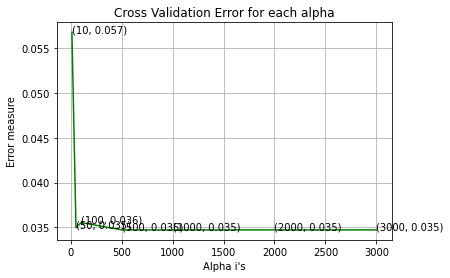

In [ ]:
alpha=[10,50,100,500,1000,2000,3000]

cv_log_error_array=[]

for i in tqdm(alpha):
    
    # XGBoost
    x_cfl=XGBClassifier(n_estimators=i,tree_method='gpu_hist')
    x_cfl.fit(X_train_bigrams_subset,y_train_byte)

    # Calibrated Classifier
    sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
    sig_clf.fit(X_train_bigrams_subset,y_train_byte)
    
    #
    predict_y = sig_clf.predict_proba(X_cv_bigrams_subset)
    cv_log_error_array.append(log_loss(y_cv_byte, predict_y, labels=x_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for n_estimators = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

In [ ]:
# Training the model with the best_parameter

x_cfl = XGBClassifier(n_estimators=alpha[best_alpha],tree_method='gpu_hist')
x_cfl.fit(X_train_bigrams_subset,y_train_byte,verbose=True)

sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(X_train_bigrams_subset,y_train_byte)

predict_y = sig_clf.predict_proba(X_train_bigrams_subset)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_byte, predict_y))

predict_y = sig_clf.predict_proba(X_cv_bigrams_subset)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv_byte, predict_y))

predict_y = sig_clf.predict_proba(X_test_bigrams_subset)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_byte, predict_y))

For values of best alpha =  2000 The train log loss is: 0.010871164718532774
For values of best alpha =  2000 The cross validation log loss is: 0.034721043651602654
For values of best alpha =  2000 The test log loss is: 0.05992548900515523


Number of misclassified points  1.1039558417663293
-------------------------------------------------- Confusion matrix --------------------------------------------------


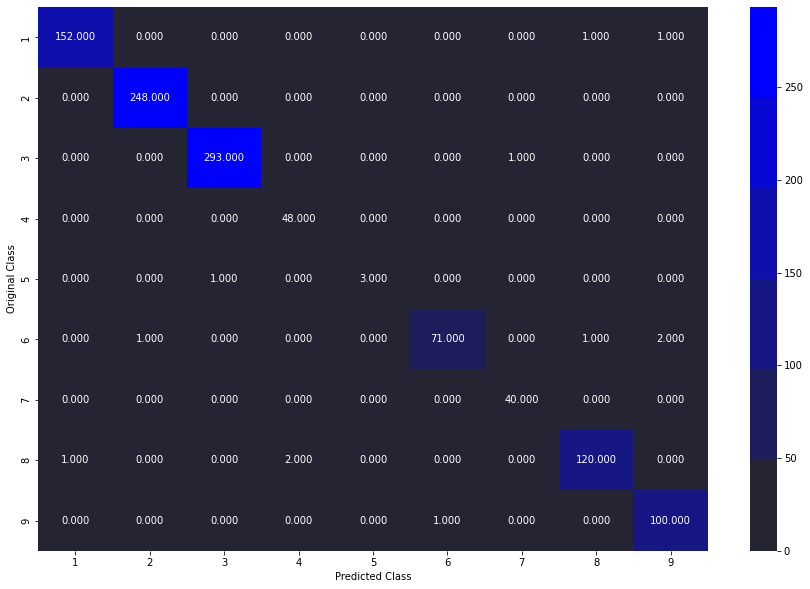

-------------------------------------------------- Precision matrix --------------------------------------------------


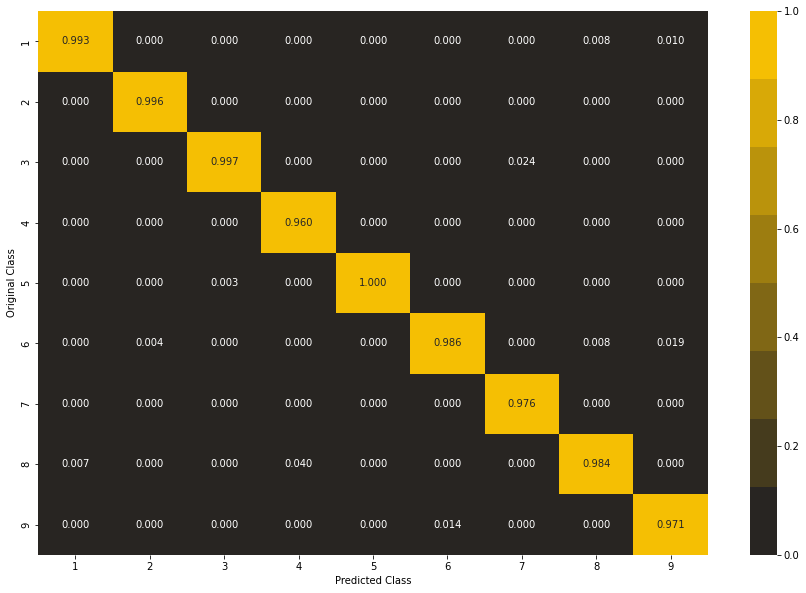

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


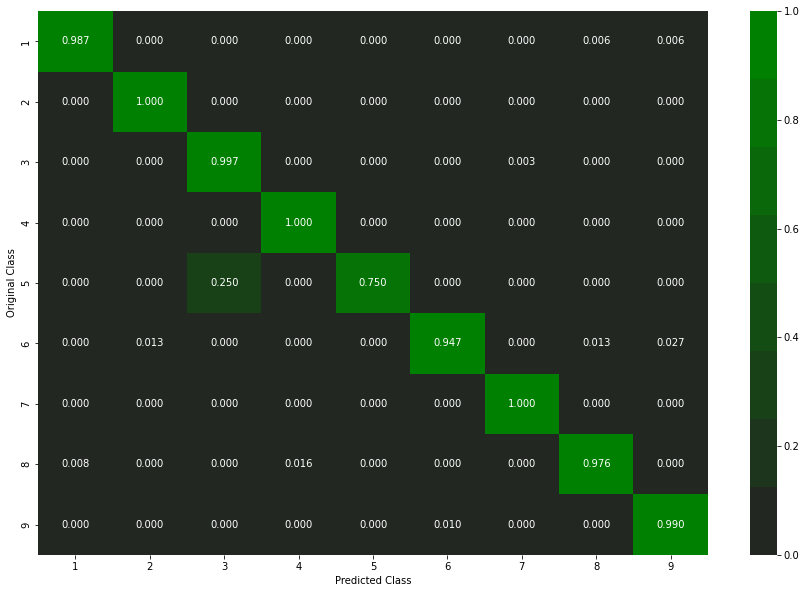

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
plot_confusion_matrix(y_test_byte, sig_clf.predict(X_test_bigrams_subset))

#### 7.9.1.2.Random forest


100%|██████████| 7/7 [36:02<00:00, 308.88s/it]


log_loss for n_estimators =  10 is 0.04608433144863113
log_loss for n_estimators =  50 is 0.03414157723559008
log_loss for n_estimators =  100 is 0.033328796655712534
log_loss for n_estimators =  500 is 0.03161552306874334
log_loss for n_estimators =  1000 is 0.0310993477889154
log_loss for n_estimators =  2000 is 0.030881972669093618
log_loss for n_estimators =  3000 is 0.031138869854743054


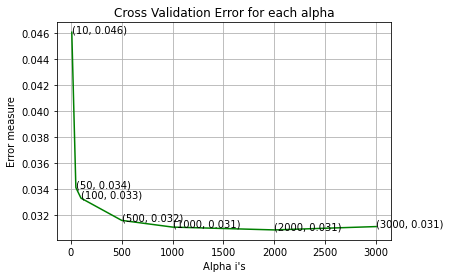

In [ ]:
alpha=[10,50,100,500,1000,2000,3000]

cv_log_error_array=[]
from sklearn.ensemble import RandomForestClassifier

# Fit exery_model asmd
for i in tqdm(alpha):
    r_cfl=RandomForestClassifier(n_estimators=i,random_state=42,n_jobs=-1)
    r_cfl.fit(X_train_bigrams_subset,y_train)

    sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
    sig_clf.fit(X_train_bigrams_subset,y_train)
    
    predict_y = sig_clf.predict_proba(X_cv_bigrams_subset)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=r_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for n_estimators = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


In [ ]:
# Fit model using best_alpha
r_cfl=RandomForestClassifier(n_estimators=alpha[best_alpha],random_state=42,n_jobs=-1)
r_cfl.fit(X_train_bigrams_subset,y_train)

sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
sig_clf.fit(X_train_bigrams_subset,y_train)

predict_y = sig_clf.predict_proba(X_train_bigrams_subset)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y))
predict_y = sig_clf.predict_proba(X_cv_bigrams_subset)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y))
predict_y = sig_clf.predict_proba(X_test_bigrams_subset)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y))

For values of best alpha =  2000 The train log loss is: 0.013004649564980918
For values of best alpha =  2000 The cross validation log loss is: 0.030881972669093618
For values of best alpha =  2000 The test log loss is: 0.04921480510402334


Number of misclassified points  0.7359705611775529
-------------------------------------------------- Confusion matrix --------------------------------------------------


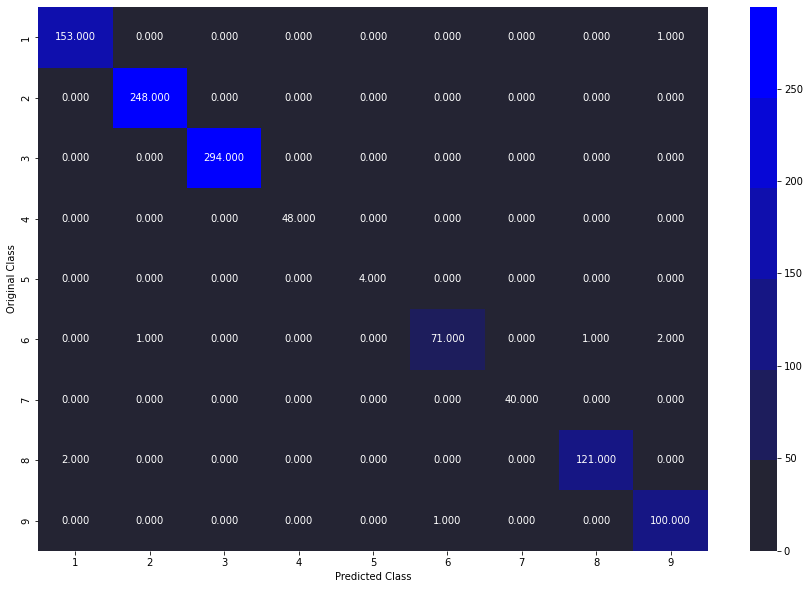

-------------------------------------------------- Precision matrix --------------------------------------------------


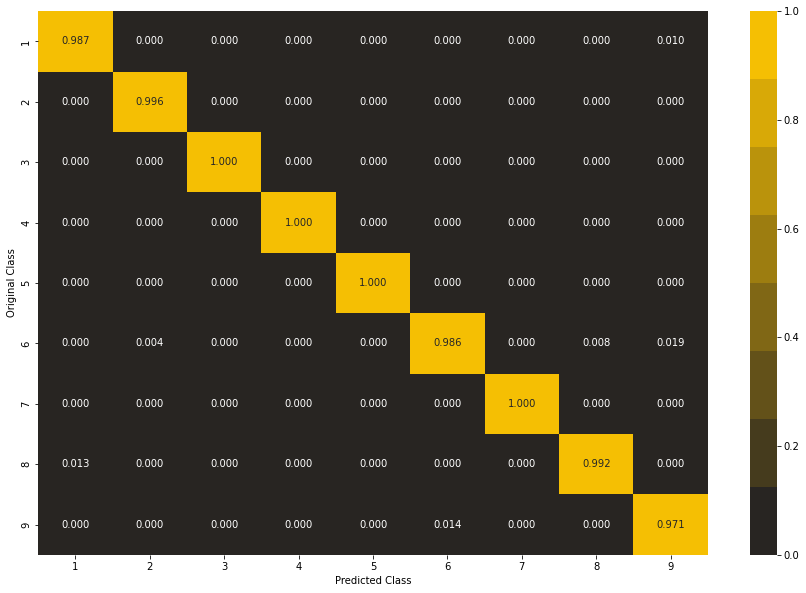

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


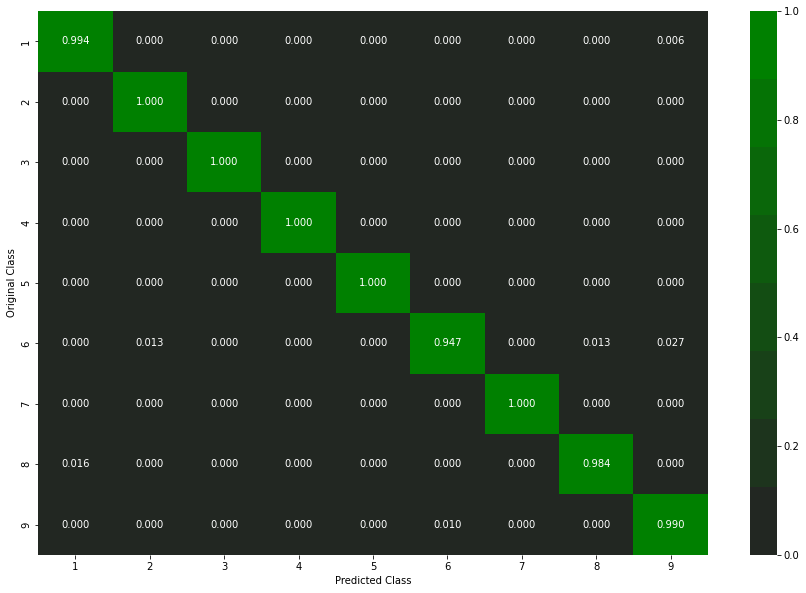

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
plot_confusion_matrix(y_test, sig_clf.predict(X_test_bigrams_subset))

In [ ]:
# https://stackoverflow.com/a/29651514
def normalize_df(df):
    result1 = df.copy()
    for feature_name in df.columns:
        if (str(feature_name) != str('ID') and str(feature_name)!=str('Class')):
            max_value = df[feature_name].max()
            min_value = df[feature_name].min()
            result1[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result1


### 7.9.2.Featurization 2 : Unigrams + Bigrams Bytefile features

#### 7.9.2.0.Data - Prep

In [ ]:
# read the unigrams data
unigrams_data = pd.read_csv('/content/drive/MyDrive/AAIC_Assignments/MicrosoftMalware/result_with_size.csv',index_col=[0])
unigrams_data.head()

,ID,0,1,2,3,4,5,6,7,8,...,f9,fa,fb,fc,fd,fe,ff,??,size,Class
0,01azqd4InC7m9JpocGv5,601905,3905,2816,3832,3345,3242,3650,3201,2965,...,3101,3211,3097,2758,3099,2759,5753,1824,4.234863,9
1,01IsoiSMh5gxyDYTl4CB,39755,8337,7249,7186,8663,6844,8420,7589,9291,...,439,281,302,7639,518,17001,54902,8588,5.538818,2
2,01jsnpXSAlgw6aPeDxrU,93506,9542,2568,2438,8925,9330,9007,2342,9107,...,2242,2885,2863,2471,2786,2680,49144,468,3.887939,9
3,01kcPWA9K2BOxQeS5Rju,21091,1213,726,817,1257,625,550,523,1078,...,485,462,516,1133,471,761,7998,13940,0.574219,1
4,01SuzwMJEIXsK7A8dQbl,19764,710,302,433,559,410,262,249,422,...,350,209,239,653,221,242,2199,9008,0.370850,8


In [ ]:
# Lets join unigrams and bi-grams train data
X_train_bigrams_subset_df = pd.DataFrame(X_train_bigrams_subset, columns=subset_columns_bigrams)
X_train_bigrams_subset_df['ID'] = train_ids_bigrams

# Re-arranging the order of the columns
col_order = ['ID'] + list(X_train_bigrams_subset_df.columns[:-1])
X_train_bigrams_subset_df = X_train_bigrams_subset_df[col_order]


# Merge the two data sets
X_train_unibi = pd.merge(X_train_bigrams_subset_df,unigrams_data,on='ID', how='left')
X_train_unibi.head()

,ID,00 00,00 01,00 02,00 04,00 05,00 06,00 07,00 09,00 0C,...,f9,fa,fb,fc,fd,fe,ff,??,size,Class
0,CL7wiUdlhOvgaJesfrmW,9158,615,146,549,598,542,144,154,576,...,2440,2635,2568,2341,2677,2811,50083,364,3.887939,9
1,5AsUO9gZ8KxIycz6Tmr3,15584,769,91,5993,61,46,54,24,56,...,306,230,208,15926,555,15353,62284,10092,7.357178,2
2,3Dm4fWY9chQxpnqAw5XJ,9635,50,26,12,11,1,2,3,5,...,243,233,275,651,224,266,1855,5836,0.358887,8
3,cuQANt4oBpMzmYKRkGf6,2042,21,92,11,2,32,13,1,0,...,16,31,83,64,15,133,797,1451188,4.270752,7
4,9PujO15SAeBy6EZNpanJ,860,15,9,7,10,7,5,8,7,...,1704,1970,1697,1674,1690,1684,2106,12176,1.351807,6


In [ ]:
# Lets join unigrams and bi-grams train data
X_cv_bigrams_subset_df = pd.DataFrame(X_cv_bigrams_subset, columns=subset_columns_bigrams)
X_cv_bigrams_subset_df['ID'] = cv_ids_bigrams

# Re-arranging the order of the columns
col_order = ['ID'] + list(X_cv_bigrams_subset_df.columns[:-1])
X_cv_bigrams_subset_df = X_cv_bigrams_subset_df[col_order]

# Merge the two data sets
X_cv_unibi = pd.merge(X_cv_bigrams_subset_df,unigrams_data,on='ID', how='left')
X_cv_unibi.head()

,ID,00 00,00 01,00 02,00 04,00 05,00 06,00 07,00 09,00 0C,...,f9,fa,fb,fc,fd,fe,ff,??,size,Class
0,0xLRN4DuvoCGbjIFQKYB,3474,31,21,18,61,15,36,53,17,...,3194,3230,3181,3176,3262,3051,7238,1494172,6.854736,3
1,95v7GINU3kVdepaZEhJo,14700,562,388,137,64,82,108,93,133,...,96,82,142,290,117,143,2383,229680,1.016846,8
2,AxOFp3oSKE5lCVHPsLjm,9971,1021,460,279,212,185,159,8,376,...,220,191,219,6377,245,7877,44013,6980,4.629639,2
3,8wMGYTWedtUEPcHJlqa6,3498,57,26,29,68,30,46,63,34,...,6059,6234,6361,6280,6213,6107,10160,1517724,9.127686,3
4,K0ij9XYNHeJR37b6naD2,6619,167,56,107,46,21,42,56,18,...,311,342,286,359,355,378,2333,22728,0.430664,1


In [ ]:
# Lets join unigrams and bi-grams train data
X_test_bigrams_subset_df = pd.DataFrame(X_test_bigrams_subset, columns=subset_columns_bigrams)
X_test_bigrams_subset_df['ID'] = test_ids_bigrams

# Re-arranging the order of the columns
col_order = ['ID'] + list(X_test_bigrams_subset_df.columns[:-1])
X_test_bigrams_subset_df = X_test_bigrams_subset_df[col_order]

# Merge the two data sets
X_test_unibi = pd.merge(X_test_bigrams_subset_df,unigrams_data,on='ID', how='left')
X_test_unibi.head()

,ID,00 00,00 01,00 02,00 04,00 05,00 06,00 07,00 09,00 0C,...,f9,fa,fb,fc,fd,fe,ff,??,size,Class
0,fHWo9xSpPTFNQ4bRYgXE,1436,8,2,8,4,6,5,8,8,...,1068,1097,1091,1079,1118,1090,1171,356528,1.878174,4
1,9FxgivRPntUB4YcV5IJa,4835,5,1,0,5,2,1,0,1,...,466,485,472,481,433,493,618,57560,0.574219,6
2,bSZgP3NGeYM4c65TjEWn,17291,1409,504,708,462,442,483,430,401,...,470,356,360,10945,600,10509,59932,12612,7.046143,2
3,icRPzo1apvBleNOfSXq2,9393,539,113,540,497,529,146,137,528,...,2420,2419,2651,2463,2656,2668,50645,384,3.887939,9
4,BM2GyKLQuC3bWXE81UcP,6902,155,83,63,44,15,41,315,29,...,1796,2529,1023,8973,21831,1479,8773,18416,0.945068,2


In [ ]:
y_train_unibi = X_train_unibi['Class']
X_train_unibi_i = X_train_unibi.drop(['ID','Class'], axis=1)
# X_train_unibi_i.head()

y_cv_unibi = X_cv_unibi['Class']
X_cv_unibi_i = X_cv_unibi.drop(['ID','Class'], axis=1)
# X_cv_unibi_i.head()

y_test_unibi = X_test_unibi['Class']
X_test_unibi_i = X_test_unibi.drop(['ID','Class'], axis=1)
# X_test_unibi_i.head()

#### 7.9.2.1.XGBoost

In [ ]:
le = LabelEncoder()

y_train_byte = le.fit_transform(y_train_unibi)
y_test_byte = le.fit_transform(y_test_unibi)
y_cv_byte = le.fit_transform(y_cv_unibi)

100%|██████████| 7/7 [25:10<00:00, 215.80s/it]


log_loss for n_estimators =  10 is 0.05643870804770698
log_loss for n_estimators =  50 is 0.03530426507250173
log_loss for n_estimators =  100 is 0.034131016264291755
log_loss for n_estimators =  500 is 0.033817560513893445
log_loss for n_estimators =  1000 is 0.033819107388668765
log_loss for n_estimators =  2000 is 0.033818820827086774
log_loss for n_estimators =  3000 is 0.033820055006901606


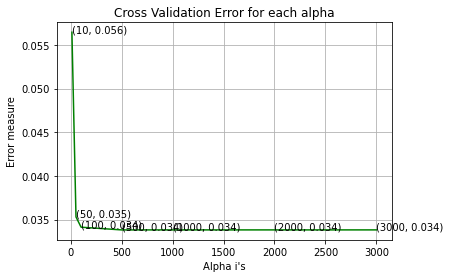

In [ ]:
alpha=[10,50,100,500,1000,2000,3000]

cv_log_error_array=[]

for i in tqdm(alpha):
    
    # XGBoost
    x_cfl=XGBClassifier(n_estimators=i,tree_method='gpu_hist')
    x_cfl.fit(X_train_unibi_i,y_train_byte)

    # Calibrated Classifier
    sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
    sig_clf.fit(X_train_unibi_i,y_train_byte)
    
    #
    predict_y = sig_clf.predict_proba(X_cv_unibi_i)
    cv_log_error_array.append(log_loss(y_cv_byte, predict_y, labels=x_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for n_estimators = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

In [ ]:
alpha[best_alpha]

500

In [ ]:
# Training the model with the best_parameter

x_cfl = XGBClassifier(n_estimators=alpha[best_alpha],tree_method='gpu_hist')
x_cfl.fit(X_train_unibi_i, y_train_byte,verbose=True)

sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(X_train_unibi_i, y_train_byte)

predict_y = sig_clf.predict_proba(X_train_unibi_i)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_byte, predict_y))

predict_y = sig_clf.predict_proba(X_cv_unibi_i)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv_byte, predict_y))

predict_y = sig_clf.predict_proba(X_test_unibi_i)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_byte, predict_y))

For values of best alpha =  500 The train log loss is: 0.01067750729038076
For values of best alpha =  500 The cross validation log loss is: 0.033817560513893445
For values of best alpha =  500 The test log loss is: 0.0561613632181604


Number of misclassified points  1.1039558417663293
-------------------------------------------------- Confusion matrix --------------------------------------------------


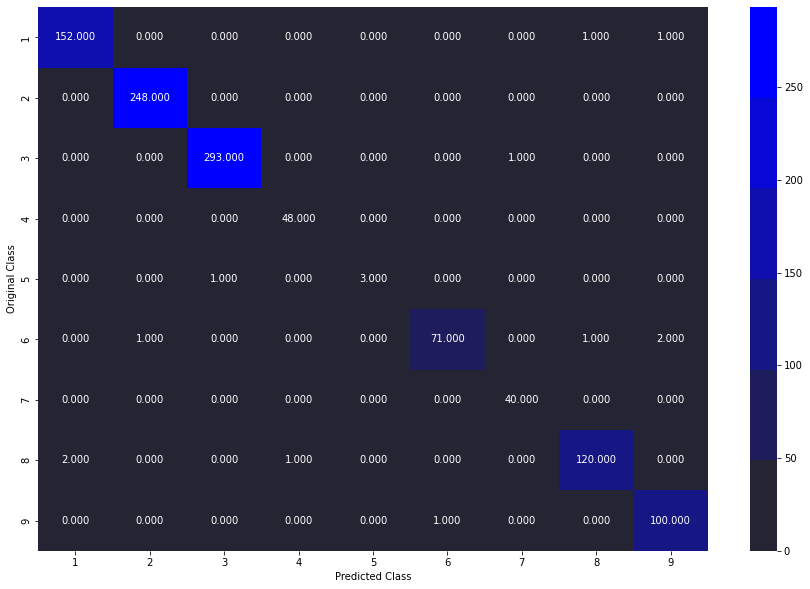

-------------------------------------------------- Precision matrix --------------------------------------------------


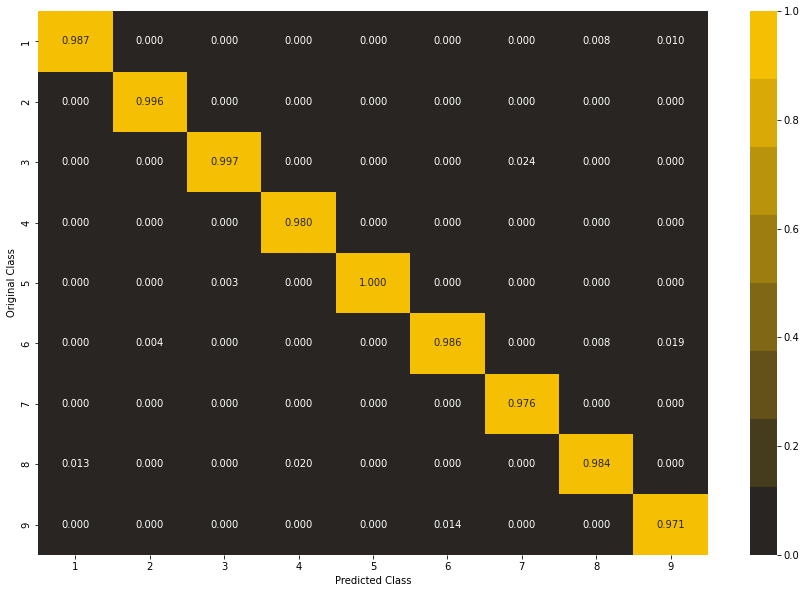

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


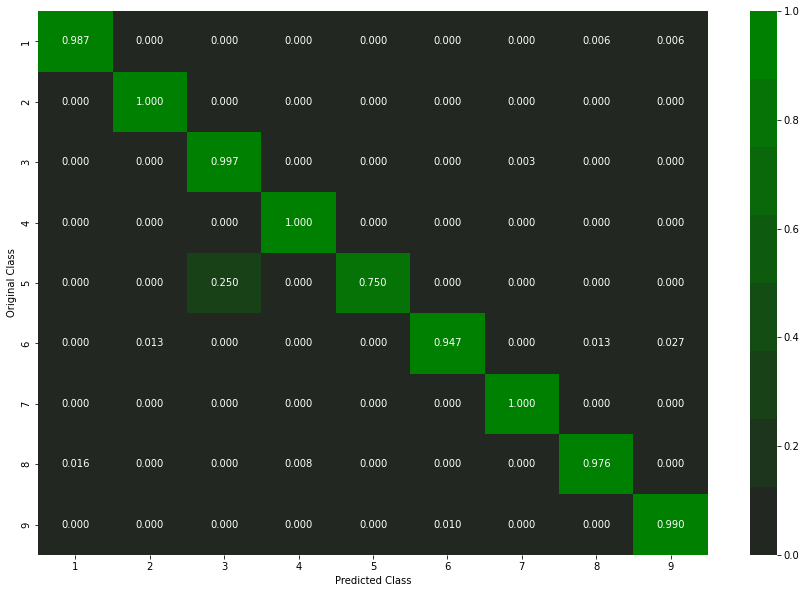

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
plot_confusion_matrix(y_test_byte, sig_clf.predict(X_test_unibi_i))

#### 7.9.2.2.Random forest


100%|██████████| 7/7 [39:58<00:00, 342.60s/it]


log_loss for n_estimators =  10 is 0.047154948978482235
log_loss for n_estimators =  50 is 0.0327265404670073
log_loss for n_estimators =  100 is 0.03197665334998208
log_loss for n_estimators =  500 is 0.030479236989316618
log_loss for n_estimators =  1000 is 0.029944515815835043
log_loss for n_estimators =  2000 is 0.030199036890575386
log_loss for n_estimators =  3000 is 0.030161461552182713


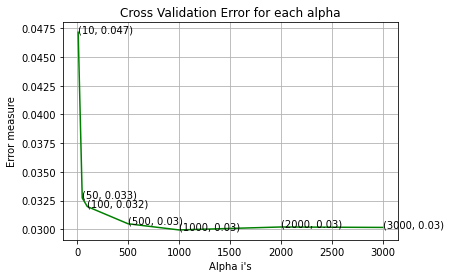

In [ ]:
alpha=[10,50,100,500,1000,2000,3000]

cv_log_error_array=[]
from sklearn.ensemble import RandomForestClassifier

# Fit exery_model asmd
for i in tqdm(alpha):
    # RFClassifier
    r_cfl=RandomForestClassifier(n_estimators=i,random_state=42,n_jobs=-1)
    r_cfl.fit(X_train_unibi_i,y_train_unibi)

    sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
    sig_clf.fit(X_train_unibi_i,y_train_unibi)
    
    predict_y = sig_clf.predict_proba(X_cv_unibi_i)
    cv_log_error_array.append(log_loss(y_cv_unibi, predict_y, labels=r_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for n_estimators = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


In [ ]:
# Fit model using best_alpha
r_cfl=RandomForestClassifier(n_estimators=alpha[best_alpha],random_state=42,n_jobs=-1)
r_cfl.fit(X_train_unibi_i, y_train_unibi)

sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
sig_clf.fit(X_train_unibi_i, y_train_unibi)

predict_y = sig_clf.predict_proba(X_train_unibi_i)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_unibi, predict_y))

predict_y = sig_clf.predict_proba(X_cv_unibi_i)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv_unibi, predict_y))

predict_y = sig_clf.predict_proba(X_test_unibi_i)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_unibi, predict_y))

For values of best alpha =  1000 The train log loss is: 0.012878647565455596
For values of best alpha =  1000 The cross validation log loss is: 0.029944515815835043
For values of best alpha =  1000 The test log loss is: 0.049055522732716496


Number of misclassified points  0.7359705611775529
-------------------------------------------------- Confusion matrix --------------------------------------------------


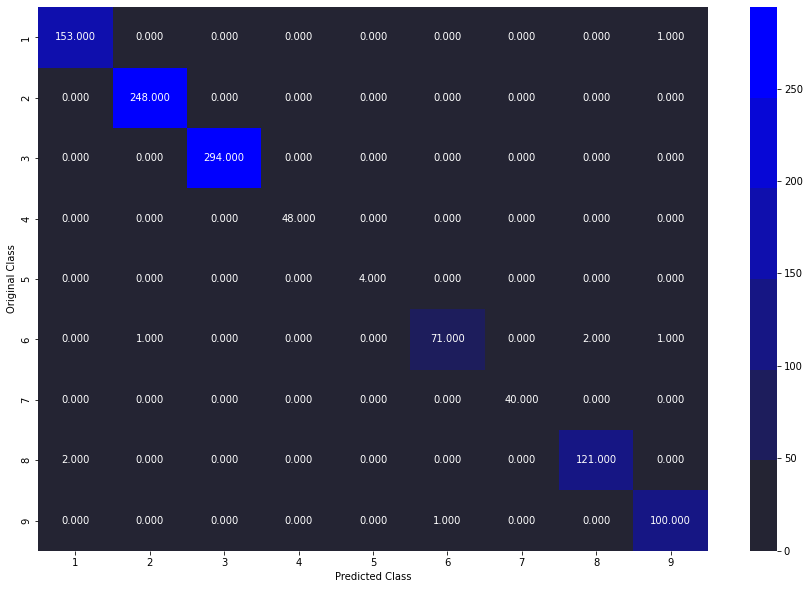

-------------------------------------------------- Precision matrix --------------------------------------------------


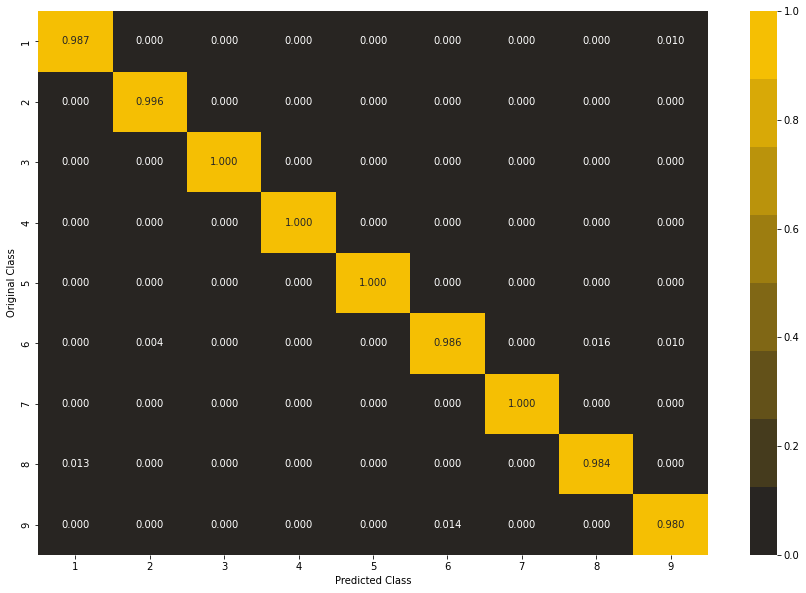

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


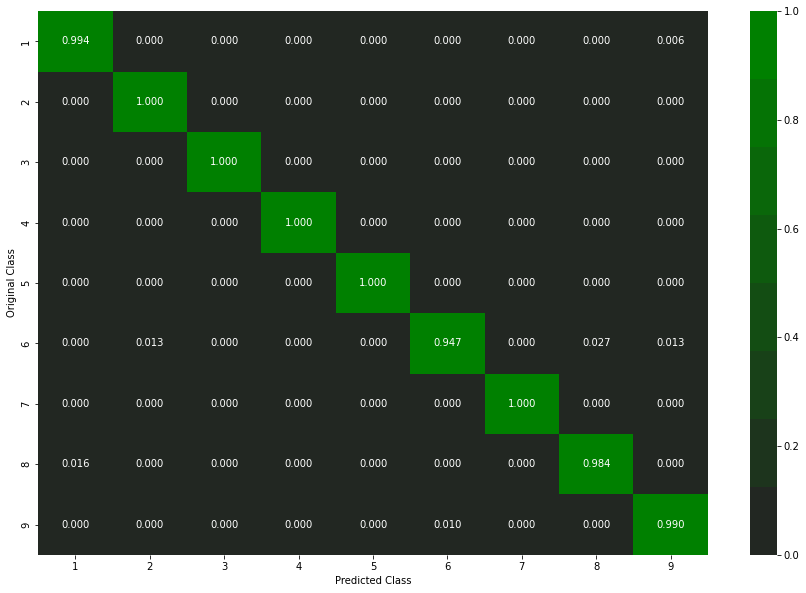

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
plot_confusion_matrix(y_test_unibi, sig_clf.predict(X_test_unibi_i))

# 8.ASM feature extraction

## 8.1.Example ASM feature extraction as image

In [ ]:
# by opening as mode=rb we are reading the file as a binary file
with open(asm_file_name[i],mode='rb') as f:
  ln = os.path.getsize("01azqd4InC7m9JpocGv5.asm")
  print("Length:",ln)
  width = int(ln**0.5)
  print("Width:",width)
  rem = ln%width
  a = array.array("B")
  a.fromfile(f,ln-rem)
  g = np.reshape(a, (len(a)//width, width))
  g = np.uint8(g)


Length: 58961309
Width: 7678


In [ ]:
g

array([[ 72,  69,  65, ...,  49,  48,  66],
       [ 55,  13,  10, ..., 114, 109, 105],
       [ 32,  59,   9, ..., 101,  99, 120],
       ...,
       [ 32,  32,  32, ...,  65,  53, 104],
       [ 32,  59,  32, ...,  32,  32, 100],
       [ 98,  32,  32, ..., 108, 105, 103]], dtype=uint8)

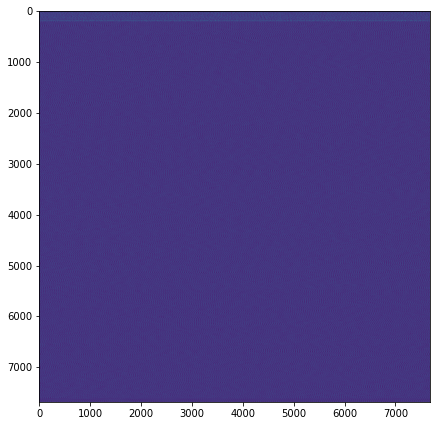

In [ ]:
# plotting the 
plt.figure(figsize=(7,15))
plt.imshow(g);

In [ ]:
columns = ['ID']+['pix_'+str(i) for i in range(800)]

In [ ]:
!rm -rf /content/drive/MyDrive/AAIC_Assignments/asm_pixel_intensity.csv asmbatch

In [ ]:
!ls

01azqd4InC7m9JpocGv5.asm  drive        sample_data  trainLabels.csv
asm_file_trial.png	  kaggle.json  train.7z


In [ ]:
!mkdir asmbatch
# !ls asmbatch

In [ ]:
!cp -r /content/drive/MyDrive/AAIC_Assignments/asm_pixel_intensity.csv .

In [ ]:
df = pd.read_csv("asm_pixel_intensity.csv")
df.head()

,ID,pix_0,pix_1,pix_2,pix_3,pix_4,pix_5,pix_6,pix_7,pix_8,...,pix_790,pix_791,pix_792,pix_793,pix_794,pix_795,pix_796,pix_797,pix_798,pix_799
0,01azqd4InC7m9JpocGv5.asm,72,69,65,68,69,82,58,48,48,...,61,61,61,61,61,61,61,61,61,61
1,01IsoiSMh5gxyDYTl4CB.asm,46,116,101,120,116,58,48,48,52,...,56,54,32,40,80,69,41,13,10,46
2,01jsnpXSAlgw6aPeDxrU.asm,72,69,65,68,69,82,58,48,48,...,61,61,61,61,61,61,61,61,61,61
3,01kcPWA9K2BOxQeS5Rju.asm,72,69,65,68,69,82,58,49,48,...,109,111,100,101,108,32,102,108,97,116
4,01SuzwMJEIXsK7A8dQbl.asm,72,69,65,68,69,82,58,48,48,...,61,61,61,61,61,61,61,61,61,61


In [ ]:
already_processed_asm = df['ID'].values
len(already_processed_asm)

910

In [ ]:
remaining_asm_files = [a for a in asm_file_name if a not in already_processed_asm]
len(remaining_asm_files)

9958

### 8.1.1.PART-1

In [ ]:
count=0
batch=0
time_taken=[]
start=datetime.now()
!mkdir asmbatch

# We need to save the first 800 pixels values of the image:
# So we are going to write the file ID i.e. the filename itself followed by the first 800 pixel values
asmpif = open('/content/drive/MyDrive/AAIC_Assignments/asm_pixel_intensity_trial.csv', 'a')
asmpif.write(','.join(columns))
asmpif.write('\n')
asmpif.close()

for file in tqdm(remaining_asm_files):
    # start=datetime.now()

    # Extract only the current asm file in the asm folder
    !7z e train.7z -o/content/asmbatch *$file -r
    display.clear_output(wait=True)
    count+=1
    
    # Open the file as mode=rb, viz we are reading the file as a binary file
    path = os.path.join('asmbatch',file)
    with open(path,mode='rb') as f:

      # Get the total size of the file, this is considered as the length
      ln = os.path.getsize(path)
      print("Length:",ln)
      width = int(ln**0.5)
      print("Width:",width)
      rem = ln%width

      # Creating an array of type code "B" meaning its an integer of 8bits = 1byte, values from 0-255
      a = array.array("B")
      # Read the first ln-rem items from the file
      a.fromfile(f,ln-rem)

      # Change it to a numpy array and reshaping it to 1,-1 meaning 1 row and howmany ever columns it may be
      # Here we are focussed with only the first 800 pixel values
      g = np.reshape(a, (1, -1))
      
      # taking only the first 810 values into consideration as we are building features using the first 800 only
      # taking 10 extra for safety
      g = g[:,:810]

      # Converting to np.uint8 ==> integer of 8 btis i.e. values from 0-255
      g = np.uint8(g)

    # open the file to write the pixel values
    asmpif = open('/content/drive/MyDrive/AAIC_Assignments/asm_pixel_intensity_trial.csv', 'a')
    
    # Write the pixel values
    asmpif.write(str(file)+',')
    # We will first write the first 799 pixel values
    for i in g[0,:799]:
        asmpif.write(str(i)+',')
    
    # Write the 800th value and \n to denote end of line
    asmpif.write(str(g[0,799])+'\n')
    asmpif.close()

    
    # if(batch == 2):
    #   print('Batch beraking breaking')
    #   break
    if(count==30):
        count=0
        batch+=1
        !rm -r -f asmbatch/
        !mkdir asmbatch
        end=datetime.now()
        print('*'*50)
        print('end, start',end,start)
        difference=end-start
        start=datetime.now()
        time_taken.append('Time taken for the batch {} of ASM files is {}'.format(batch,difference))
        print('Time taken for the batch {} of ASM files is {}'.format(batch,difference))

In [ ]:
# The above lines of code extracted around 910 datafiles. But we need to use multiprocessing to speed things up

### 8.1.2.PART-2

In [ ]:
# This may not get completed in one go.. we will keep on redoing this until all the files are done

#http://flint.cs.yale.edu/cs421/papers/x86-asm/asm.html

def firstprocess():
    count=0
    batch=0
    !mkdir asmbatch1

    # We need to save the first 800 pixels values of the image:
    # So we are going to write the file ID i.e. the filename itself followed by the first 800 pixel values
    asmpif = open('/content/drive/MyDrive/AAIC_Assignments/MM_DATA/asm_pixel_intensity_1.csv', 'a')
    asmpif.write(','.join(columns))
    asmpif.write('\n')
    asmpif.close()

    for file in tqdm(first_list):
        # start=datetime.now()

        # Extract only the current asm file in the asm folder
        !7z e train.7z -o/content/asmbatch1 *$file -r
        display.clear_output(wait=True)
        count+=1
        
        # Open the file as mode=rb, viz we are reading the file as a binary file
        path = os.path.join('asmbatch1',file)
        with open(path,mode='rb') as f:

          # Get the total size of the file, this is considered as the length
          ln = os.path.getsize(path)
          width = int(ln**0.5)
          rem = ln%width

          # Creating an array of type code "B" meaning its an integer of 8bits = 1byte, values from 0-255
          a = array.array("B")
          # Read the first ln-rem items from the file
          a.fromfile(f,900)

          # Change it to a numpy array and reshaping it to 1,-1 meaning 1 row and howmany ever columns it may be
          # Here we are focussed with only the first 800 pixel values
          g = np.reshape(a, (1, -1))
          
          # taking only the first 810 values into consideration as we are building features using the first 800 only
          # taking 10 extra for safety
          g = g[:,:810]

          # Converting to np.uint8 ==> integer of 8 btis i.e. values from 0-255
          g = np.uint8(g)

        # open the file to write the pixel values
        asmpif = open('/content/drive/MyDrive/AAIC_Assignments/MM_DATA/asm_pixel_intensity_1.csv', 'a')
        
        # Write the pixel values
        asmpif.write(str(file)+',')
        # We will first write the first 799 pixel values
        for i in g[0,:799]:
            asmpif.write(str(i)+',')
        
        # Write the 800th value and \n to denote end of line
        asmpif.write(str(g[0,799])+'\n')
        asmpif.close()

        
        # if(batch == 2):
        #   print('Batch beraking breaking')
        #   break
        if(count==30):
            count=0
            batch+=1
            !rm -r -f asmbatch1/
            !mkdir asmbatch1


def secondprocess():
    count=0
    batch=0
    !mkdir asmbatch2

    # We need to save the first 800 pixels values of the image:
    # So we are going to write the file ID i.e. the filename itself followed by the first 800 pixel values
    asmpif = open('/content/drive/MyDrive/AAIC_Assignments/MM_DATA/asm_pixel_intensity_2.csv', 'a')
    asmpif.write(','.join(columns))
    asmpif.write('\n')
    asmpif.close()

    for file in tqdm(second_list):
        # start=datetime.now()

        # Extract only the current asm file in the asm folder
        !7z e train.7z -o/content/asmbatch2 *$file -r
        display.clear_output(wait=True)
        count+=1
        
        # Open the file as mode=rb, viz we are reading the file as a binary file
        path = os.path.join('asmbatch2',file)
        with open(path,mode='rb') as f:

          # Get the total size of the file, this is considered as the length
          ln = os.path.getsize(path)
          width = int(ln**0.5)
          rem = ln%width

          # Creating an array of type code "B" meaning its an integer of 8bits = 1byte, values from 0-255
          a = array.array("B")
          # Read the first ln-rem items from the file
          a.fromfile(f,900)

          # Change it to a numpy array and reshaping it to 1,-1 meaning 1 row and howmany ever columns it may be
          # Here we are focussed with only the first 800 pixel values
          g = np.reshape(a, (1, -1))
          
          # taking only the first 810 values into consideration as we are building features using the first 800 only
          # taking 10 extra for safety
          g = g[:,:810]

          # Converting to np.uint8 ==> integer of 8 btis i.e. values from 0-255
          g = np.uint8(g)

        # open the file to write the pixel values
        asmpif = open('/content/drive/MyDrive/AAIC_Assignments/MM_DATA/asm_pixel_intensity_2.csv', 'a')
        
        # Write the pixel values
        asmpif.write(str(file)+',')
        # We will first write the first 799 pixel values
        for i in g[0,:799]:
            asmpif.write(str(i)+',')
        
        # Write the 800th value and \n to denote end of line
        asmpif.write(str(g[0,799])+'\n')
        asmpif.close()

        
        # if(batch == 2):
        #   print('Batch beraking breaking')
        #   break
        if(count==30):
            count=0
            batch+=1
            !rm -r -f asmbatch2/
            !mkdir asmbatch2


def thirdprocess():
    count=0
    batch=0
    !mkdir asmbatch3

    # We need to save the first 800 pixels values of the image:
    # So we are going to write the file ID i.e. the filename itself followed by the first 800 pixel values
    asmpif = open('/content/drive/MyDrive/AAIC_Assignments/MM_DATA/asm_pixel_intensity_3.csv', 'a')
    asmpif.write(','.join(columns))
    asmpif.write('\n')
    asmpif.close()

    for file in tqdm(third_list):
        # start=datetime.now()

        # Extract only the current asm file in the asm folder
        !7z e train.7z -o/content/asmbatch3 *$file -r
        display.clear_output(wait=True)
        count+=1
        
        # Open the file as mode=rb, viz we are reading the file as a binary file
        path = os.path.join('asmbatch3',file)
        with open(path,mode='rb') as f:

          # Get the total size of the file, this is considered as the length
          ln = os.path.getsize(path)
          width = int(ln**0.5)
          rem = ln%width

          # Creating an array of type code "B" meaning its an integer of 8bits = 1byte, values from 0-255
          a = array.array("B")
          # Read the first ln-rem items from the file
          a.fromfile(f,900)

          # Change it to a numpy array and reshaping it to 1,-1 meaning 1 row and howmany ever columns it may be
          # Here we are focussed with only the first 800 pixel values
          g = np.reshape(a, (1, -1))
          
          # taking only the first 810 values into consideration as we are building features using the first 800 only
          # taking 10 extra for safety
          g = g[:,:810]

          # Converting to np.uint8 ==> integer of 8 btis i.e. values from 0-255
          g = np.uint8(g)

        # open the file to write the pixel values
        asmpif = open('/content/drive/MyDrive/AAIC_Assignments/MM_DATA/asm_pixel_intensity_3.csv', 'a')
        
        # Write the pixel values
        asmpif.write(str(file)+',')
        # We will first write the first 799 pixel values
        for i in g[0,:799]:
            asmpif.write(str(i)+',')
        
        # Write the 800th value and \n to denote end of line
        asmpif.write(str(g[0,799])+'\n')
        asmpif.close()

        
        # if(batch == 2):
        #   print('Batch beraking breaking')
        #   break
        if(count==30):
            count=0
            batch+=1
            !rm -r -f asmbatch3/
            !mkdir asmbatch3


def fourthprocess():
    count=0
    batch=0
    !mkdir asmbatch4

    # We need to save the first 800 pixels values of the image:
    # So we are going to write the file ID i.e. the filename itself followed by the first 800 pixel values
    asmpif = open('/content/drive/MyDrive/AAIC_Assignments/MM_DATA/asm_pixel_intensity_4.csv', 'a')
    asmpif.write(','.join(columns))
    asmpif.write('\n')
    asmpif.close()

    for file in tqdm(fourth_list):
        # start=datetime.now()

        # Extract only the current asm file in the asm folder
        !7z e train.7z -o/content/asmbatch4 *$file -r
        display.clear_output(wait=True)
        count+=1
        
        # Open the file as mode=rb, viz we are reading the file as a binary file
        path = os.path.join('asmbatch4',file)
        with open(path,mode='rb') as f:

          # Get the total size of the file, this is considered as the length
          ln = os.path.getsize(path)
          width = int(ln**0.5)
          rem = ln%width

          # Creating an array of type code "B" meaning its an integer of 8bits = 1byte, values from 0-255
          a = array.array("B")
          # Read the first ln-rem items from the file
          a.fromfile(f,900)

          # Change it to a numpy array and reshaping it to 1,-1 meaning 1 row and howmany ever columns it may be
          # Here we are focussed with only the first 800 pixel values
          g = np.reshape(a, (1, -1))
          
          # taking only the first 810 values into consideration as we are building features using the first 800 only
          # taking 10 extra for safety
          g = g[:,:810]

          # Converting to np.uint8 ==> integer of 8 btis i.e. values from 0-255
          g = np.uint8(g)

        # open the file to write the pixel values
        asmpif = open('/content/drive/MyDrive/AAIC_Assignments/MM_DATA/asm_pixel_intensity_4.csv', 'a')
        
        # Write the pixel values
        asmpif.write(str(file)+',')
        # We will first write the first 799 pixel values
        for i in g[0,:799]:
            asmpif.write(str(i)+',')
        
        # Write the 800th value and \n to denote end of line
        asmpif.write(str(g[0,799])+'\n')
        asmpif.close()

        
        # if(batch == 2):
        #   print('Batch beraking breaking')
        #   break
        if(count==30):
            count=0
            batch+=1
            !rm -r -f asmbatch4/
            !mkdir asmbatch4


def fifthprocess():
    count=0
    batch=0
    !mkdir asmbatch5

    # We need to save the first 800 pixels values of the image:
    # So we are going to write the file ID i.e. the filename itself followed by the first 800 pixel values
    asmpif = open('/content/drive/MyDrive/AAIC_Assignments/MM_DATA/asm_pixel_intensity_5.csv', 'a')
    asmpif.write(','.join(columns))
    asmpif.write('\n')
    asmpif.close()

    for file in tqdm(fifth_list):
        # start=datetime.now()

        # Extract only the current asm file in the asm folder
        !7z e train.7z -o/content/asmbatch5 *$file -r
        display.clear_output(wait=True)
        count+=1
        
        # Open the file as mode=rb, viz we are reading the file as a binary file
        path = os.path.join('asmbatch5',file)
        with open(path,mode='rb') as f:

          # Get the total size of the file, this is considered as the length
          ln = os.path.getsize(path)
          width = int(ln**0.5)
          rem = ln%width

          # Creating an array of type code "B" meaning its an integer of 8bits = 1byte, values from 0-255
          a = array.array("B")
          # Read the first ln-rem items from the file
          a.fromfile(f,900)

          # Change it to a numpy array and reshaping it to 1,-1 meaning 1 row and howmany ever columns it may be
          # Here we are focussed with only the first 800 pixel values
          g = np.reshape(a, (1, -1))
          
          # taking only the first 810 values into consideration as we are building features using the first 800 only
          # taking 10 extra for safety
          g = g[:,:810]

          # Converting to np.uint8 ==> integer of 8 btis i.e. values from 0-255
          g = np.uint8(g)

        # open the file to write the pixel values
        asmpif = open('/content/drive/MyDrive/AAIC_Assignments/MM_DATA/asm_pixel_intensity_5.csv', 'a')
        
        # Write the pixel values
        asmpif.write(str(file)+',')
        # We will first write the first 799 pixel values
        for i in g[0,:799]:
            asmpif.write(str(i)+',')
        
        # Write the 800th value and \n to denote end of line
        asmpif.write(str(g[0,799])+'\n')
        asmpif.close()

        
        # if(batch == 2):
        #   print('Batch beraking breaking')
        #   break
        if(count==30):
            count=0
            batch+=1
            !rm -r -f asmbatch5/
            !mkdir asmbatch5



def main():
    #the below code is used for multiprogramming
    #the number of process depends upon the number of cores present System
    #process is used to call multiprogramming
    manager=multiprocessing.Manager() 	
    p1=Process(target=firstprocess)
    p2=Process(target=secondprocess)
    p3=Process(target=thirdprocess)
    p4=Process(target=fourthprocess)
    p5=Process(target=fifthprocess)
    #p1.start() is used to start the thread execution
    p1.start()
    p2.start()
    p3.start()
    p4.start()
    p5.start()
    #After completion all the threads are joined
    p1.join()
    p2.join()
    p3.join()
    p4.join()
    p5.join()

if __name__=="__main__":
    main()

Lets see how many files were processed in the above segment. Based on that we will divide the remaining files and use multiprocessing to extract features 

In [ ]:
df_0 = pd.read_csv("/content/drive/MyDrive/AAIC_Assignments/MM_DATA/asm_pixel_intensity.csv")
df_1 = pd.read_csv("/content/drive/MyDrive/AAIC_Assignments/MM_DATA/asm_pixel_intensity_1.csv")
df_2 = pd.read_csv("/content/drive/MyDrive/AAIC_Assignments/MM_DATA/asm_pixel_intensity_2.csv")
df_3 = pd.read_csv("/content/drive/MyDrive/AAIC_Assignments/MM_DATA/asm_pixel_intensity_3.csv")
df_4 = pd.read_csv("/content/drive/MyDrive/AAIC_Assignments/MM_DATA/asm_pixel_intensity_4.csv")
df_5 = pd.read_csv("/content/drive/MyDrive/AAIC_Assignments/MM_DATA/asm_pixel_intensity_5.csv")


In [ ]:
# Total number of files
len(asm_file_name)

10868

In [ ]:
# Processed files
already_processed_asm = []
for df in [df_0,df_1,df_2,df_3,df_4,df_5]:
  already_processed_asm.extend(df['ID'].values)

len(set(already_processed_asm))


10868

In [ ]:
already_processed_asm = list(set(already_processed_asm))
len(already_processed_asm)

10680

In [ ]:
# Remaining files
remaining_asm_files = [a for a in asm_file_name if a not in already_processed_asm]
len(remaining_asm_files)

188

In [ ]:
# Split the remaining files into two sections and the pass it for multiprocessing
index = len(remaining_asm_files)//2
first_list = remaining_asm_files[0:index]
second_list = remaining_asm_files[index:]

### 8.1.3.PART-3

In [ ]:
# Here we are going to continue with our process. WE are going to use first and second list

#http://flint.cs.yale.edu/cs421/papers/x86-asm/asm.html

def firstprocess():
    count=0
    batch=0
    !mkdir asmbatch1

    # We need to save the first 800 pixels values of the image:
    # So we are going to write the file ID i.e. the filename itself followed by the first 800 pixel values
    # asmpif = open('/content/drive/MyDrive/AAIC_Assignments/MM_DATA/asm_pixel_intensity_1.csv', 'a')
    # asmpif.write(','.join(columns))
    # asmpif.write('\n')
    # asmpif.close()

    for file in tqdm(first_list):
        # start=datetime.now()

        # Extract only the current asm file in the asm folder
        !7z e train.7z -o/content/asmbatch1 *$file -r
        display.clear_output(wait=True)
        count+=1
        
        # Open the file as mode=rb, viz we are reading the file as a binary file
        path = os.path.join('asmbatch1',file)
        with open(path,mode='rb') as f:

          # Get the total size of the file, this is considered as the length
          ln = os.path.getsize(path)
          width = int(ln**0.5)
          rem = ln%width

          # Creating an array of type code "B" meaning its an integer of 8bits = 1byte, values from 0-255
          a = array.array("B")
          # Read the first ln-rem items from the file
          a.fromfile(f,900)

          # Change it to a numpy array and reshaping it to 1,-1 meaning 1 row and howmany ever columns it may be
          # Here we are focussed with only the first 800 pixel values
          g = np.reshape(a, (1, -1))
          
          # taking only the first 810 values into consideration as we are building features using the first 800 only
          # taking 10 extra for safety
          g = g[:,:810]

          # Converting to np.uint8 ==> integer of 8 btis i.e. values from 0-255
          g = np.uint8(g)

        # open the file to write the pixel values
        asmpif = open('/content/drive/MyDrive/AAIC_Assignments/MM_DATA/asm_pixel_intensity_1.csv', 'a')
        
        # Write the pixel values
        asmpif.write(str(file)+',')
        # We will first write the first 799 pixel values
        for i in g[0,:799]:
            asmpif.write(str(i)+',')
        
        # Write the 800th value and \n to denote end of line
        asmpif.write(str(g[0,799])+'\n')
        asmpif.close()

        
        # if(batch == 2):
        #   print('Batch beraking breaking')
        #   break
        if(count==30):
            count=0
            batch+=1
            !rm -r -f asmbatch1/
            !mkdir asmbatch1


def secondprocess():
    count=0
    batch=0
    !mkdir asmbatch2

    # We need to save the first 800 pixels values of the image:
    # So we are going to write the file ID i.e. the filename itself followed by the first 800 pixel values
    # asmpif = open('/content/drive/MyDrive/AAIC_Assignments/MM_DATA/asm_pixel_intensity_2.csv', 'a')
    # asmpif.write(','.join(columns))
    # asmpif.write('\n')
    # asmpif.close()

    for file in tqdm(second_list):
        # start=datetime.now()

        # Extract only the current asm file in the asm folder
        !7z e train.7z -o/content/asmbatch2 *$file -r
        display.clear_output(wait=True)
        count+=1
        
        # Open the file as mode=rb, viz we are reading the file as a binary file
        path = os.path.join('asmbatch2',file)
        with open(path,mode='rb') as f:

          # Get the total size of the file, this is considered as the length
          ln = os.path.getsize(path)
          width = int(ln**0.5)
          rem = ln%width

          # Creating an array of type code "B" meaning its an integer of 8bits = 1byte, values from 0-255
          a = array.array("B")
          # Read the first 900 items from the file
          a.fromfile(f,900)

          # Change it to a numpy array and reshaping it to 1,-1 meaning 1 row and howmany ever columns it may be
          # Here we are focussed with only the first 800 pixel values
          g = np.reshape(a, (1, -1))
          
          # taking only the first 810 values into consideration as we are building features using the first 800 only
          # taking 10 extra for safety
          g = g[:,:810]

          # Converting to np.uint8 ==> integer of 8 btis i.e. values from 0-255
          g = np.uint8(g)

        # open the file to write the pixel values
        asmpif = open('/content/drive/MyDrive/AAIC_Assignments/MM_DATA/asm_pixel_intensity_2.csv', 'a')
        
        # Write the pixel values
        asmpif.write(str(file)+',')
        # We will first write the first 799 pixel values
        for i in g[0,:799]:
            asmpif.write(str(i)+',')
        
        # Write the 800th value and \n to denote end of line
        asmpif.write(str(g[0,799])+'\n')
        asmpif.close()

        
        # if(batch == 2):
        #   print('Batch beraking breaking')
        #   break
        if(count==30):
            count=0
            batch+=1
            !rm -r -f asmbatch2/
            !mkdir asmbatch2




def main():
    #the below code is used for multiprogramming
    #the number of process depends upon the number of cores present System
    #process is used to call multiprogramming
    manager=multiprocessing.Manager() 	
    p1=Process(target=firstprocess)
    p2=Process(target=secondprocess)
    #p1.start() is used to start the thread execution
    p1.start()
    p2.start()
    #After completion all the threads are joined
    p1.join()
    p2.join()

if __name__=="__main__":
    main()

100%|██████████| 94/94 [35:54<00:00, 22.92s/it]


## 8.2.Combine all ASM extracted feature files together

In [ ]:
df_0 = pd.read_csv("/content/drive/MyDrive/AAIC_Assignments/MM_DATA/asm_pixel_intensity.csv")
df_1 = pd.read_csv("/content/drive/MyDrive/AAIC_Assignments/MM_DATA/asm_pixel_intensity_1.csv")
df_2 = pd.read_csv("/content/drive/MyDrive/AAIC_Assignments/MM_DATA/asm_pixel_intensity_2.csv")
df_3 = pd.read_csv("/content/drive/MyDrive/AAIC_Assignments/MM_DATA/asm_pixel_intensity_3.csv")
df_4 = pd.read_csv("/content/drive/MyDrive/AAIC_Assignments/MM_DATA/asm_pixel_intensity_4.csv")
df_5 = pd.read_csv("/content/drive/MyDrive/AAIC_Assignments/MM_DATA/asm_pixel_intensity_5.csv")


In [ ]:
# Combine all the dataframes into one csv file

# Store the file names i.e. asm_pixel_intensity.csv
files = [df_0, df_1,df_2, df_3,df_4,df_5]
combined = []
for f in files:
    combined.append(f)
combined_df = pd.concat(combined,ignore_index=True)

In [ ]:
combined_df.head()

,ID,pix_0,pix_1,pix_2,pix_3,pix_4,pix_5,pix_6,pix_7,pix_8,...,pix_790,pix_791,pix_792,pix_793,pix_794,pix_795,pix_796,pix_797,pix_798,pix_799
0,01azqd4InC7m9JpocGv5.asm,72,69,65,68,69,82,58,48,48,...,61,61,61,61,61,61,61,61,61,61
1,01IsoiSMh5gxyDYTl4CB.asm,46,116,101,120,116,58,48,48,52,...,56,54,32,40,80,69,41,13,10,46
2,01jsnpXSAlgw6aPeDxrU.asm,72,69,65,68,69,82,58,48,48,...,61,61,61,61,61,61,61,61,61,61
3,01kcPWA9K2BOxQeS5Rju.asm,72,69,65,68,69,82,58,49,48,...,109,111,100,101,108,32,102,108,97,116
4,01SuzwMJEIXsK7A8dQbl.asm,72,69,65,68,69,82,58,48,48,...,61,61,61,61,61,61,61,61,61,61


In [ ]:
# The number of unique ID's should be same as that of the number of rows
len(set(combined_df['ID'].values)), len(combined_df)

(10868, 10879)

In [ ]:
# Here the number of rows exceed the number of unique files ==> we have duplicate rows
# Let's drop them and create a new dataframe and then check the same thing again
cleaned_df = combined_df.drop_duplicates()
len(set(cleaned_df['ID'].values)), len(cleaned_df)

(10868, 10868)

In [ ]:
# Perfect
# Now we will save this combined file
cleaned_df.to_csv('/content/drive/MyDrive/AAIC_Assignments/MicrosoftMalware/asm_pixel_intensity_features_cleaned.csv')

## 8.3.Read asm files from drive

In [ ]:
# Read the asm file size feature
asm_size = pd.read_csv('/content/drive/MyDrive/AAIC_Assignments/MicrosoftMalware/asm_with_size.csv',index_col=0)
asm_size.head()

,ID,size_asm,Class
0,01azqd4InC7m9JpocGv5,56.229886,9
1,01IsoiSMh5gxyDYTl4CB,13.999378,2
2,01jsnpXSAlgw6aPeDxrU,8.507785,9
3,01kcPWA9K2BOxQeS5Rju,0.078190,1
4,01SuzwMJEIXsK7A8dQbl,0.996723,8


In [ ]:
# Read the pixel intensity features
asm_pix_df = pd.read_csv('/content/drive/MyDrive/AAIC_Assignments/MicrosoftMalware/asm_pixel_intensity_features_cleaned.csv',index_col=0)
asm_pix_df['ID'] = asm_pix_df['ID'].apply(lambda x:x.removesuffix('.asm'))
asm_pix_df.head()

,ID,pix_0,pix_1,pix_2,pix_3,pix_4,pix_5,pix_6,pix_7,pix_8,...,pix_790,pix_791,pix_792,pix_793,pix_794,pix_795,pix_796,pix_797,pix_798,pix_799
0,01azqd4InC7m9JpocGv5,72,69,65,68,69,82,58,48,48,...,61,61,61,61,61,61,61,61,61,61
1,01IsoiSMh5gxyDYTl4CB,46,116,101,120,116,58,48,48,52,...,56,54,32,40,80,69,41,13,10,46
2,01jsnpXSAlgw6aPeDxrU,72,69,65,68,69,82,58,48,48,...,61,61,61,61,61,61,61,61,61,61
3,01kcPWA9K2BOxQeS5Rju,72,69,65,68,69,82,58,49,48,...,109,111,100,101,108,32,102,108,97,116
4,01SuzwMJEIXsK7A8dQbl,72,69,65,68,69,82,58,48,48,...,61,61,61,61,61,61,61,61,61,61


In [ ]:
# Read the asm opcodes features
asm_opcodes = pd.read_csv('/content/drive/MyDrive/AAIC_Assignments/MicrosoftMalware/asmoutputfile.csv')
# asm_pix_df['ID'] = asm_pix_df['ID'].apply(lambda x:x.removesuffix('.asm'))
asm_opcodes.head()

,ID,HEADER:,.text:,.Pav:,.idata:,.data:,.bss:,.rdata:,.edata:,.rsrc:,...,:dword,edx,esi,eax,ebx,ecx,edi,ebp,esp,eip
0,01kcPWA9K2BOxQeS5Rju,19,744,0,127,57,0,323,0,3,...,137,18,66,15,43,83,0,17,48,29
1,1E93CpP60RHFNiT5Qfvn,17,838,0,103,49,0,0,0,3,...,130,18,29,48,82,12,0,14,0,20
2,3ekVow2ajZHbTnBcsDfX,17,427,0,50,43,0,145,0,3,...,84,13,42,10,67,14,0,11,0,9
3,3X2nY7iQaPBIWDrAZqJe,17,227,0,43,19,0,0,0,3,...,25,6,8,14,7,2,0,8,0,6
4,46OZzdsSKDCFV8h7XWxf,17,402,0,59,170,0,0,0,3,...,18,12,9,18,29,5,0,11,0,11


In [ ]:
# Merge the two data sets
x = pd.merge(asm_pix_df,asm_size,on='ID', how='left')
y = x['Class']

print(len(x))
x.head()

10868


,ID,pix_0,pix_1,pix_2,pix_3,pix_4,pix_5,pix_6,pix_7,pix_8,...,pix_792,pix_793,pix_794,pix_795,pix_796,pix_797,pix_798,pix_799,size_asm,Class
0,01azqd4InC7m9JpocGv5,72,69,65,68,69,82,58,48,48,...,61,61,61,61,61,61,61,61,56.229886,9
1,01IsoiSMh5gxyDYTl4CB,46,116,101,120,116,58,48,48,52,...,32,40,80,69,41,13,10,46,13.999378,2
2,01jsnpXSAlgw6aPeDxrU,72,69,65,68,69,82,58,48,48,...,61,61,61,61,61,61,61,61,8.507785,9
3,01kcPWA9K2BOxQeS5Rju,72,69,65,68,69,82,58,49,48,...,100,101,108,32,102,108,97,116,0.078190,1
4,01SuzwMJEIXsK7A8dQbl,72,69,65,68,69,82,58,48,48,...,61,61,61,61,61,61,61,61,0.996723,8


In [ ]:
# Merge opcodes with pixel_intensty+asm_size
x_all = pd.merge(x,asm_opcodes,on='ID', how='left')
y_all = x_all['Class']

x_all.drop(['Class'],axis=1,inplace=True)
print(len(x_all))

x_all.head()

10868


,ID,pix_0,pix_1,pix_2,pix_3,pix_4,pix_5,pix_6,pix_7,pix_8,...,:dword,edx,esi,eax,ebx,ecx,edi,ebp,esp,eip
0,01azqd4InC7m9JpocGv5,72,69,65,68,69,82,58,48,48,...,4371,808,2290,1281,587,701,0,15,14,456
1,01IsoiSMh5gxyDYTl4CB,46,116,101,120,116,58,48,48,52,...,1446,260,1090,391,905,420,0,24,22,227
2,01jsnpXSAlgw6aPeDxrU,72,69,65,68,69,82,58,48,48,...,903,5,547,5,451,56,0,27,0,117
3,01kcPWA9K2BOxQeS5Rju,72,69,65,68,69,82,58,49,48,...,137,18,66,15,43,83,0,17,48,29
4,01SuzwMJEIXsK7A8dQbl,72,69,65,68,69,82,58,48,48,...,1220,18,1228,24,1546,107,0,15,0,76


In [ ]:
x.drop(['Class'],axis=1,inplace=True)

## 8.4.Visualize asm_pixel_intensity features using TSNE

In [ ]:
# Function to normalize the data
def normalize_df(df):
  
  result1 = df.copy()
  for feature_name in df.columns:
      if (str(feature_name) != str('ID') and str(feature_name)!=str('Class')):
          max_value = df[feature_name].max()
          min_value = df[feature_name].min()
          if min_value!=max_value:
            result1[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
          elif max_value==0:
            result1[feature_name] = df[feature_name]
          else:
            result1[feature_name] = df[feature_name] / (max_value)
  return result1

### 8.4.1.Only pixel intensity features

In [ ]:
result_x = x.copy()
result_y = y
result_x = result_x.drop(['ID','size_asm'], axis=1)
result_x.head()

,pix_0,pix_1,pix_2,pix_3,pix_4,pix_5,pix_6,pix_7,pix_8,pix_9,...,pix_790,pix_791,pix_792,pix_793,pix_794,pix_795,pix_796,pix_797,pix_798,pix_799
0,72,69,65,68,69,82,58,48,48,52,...,61,61,61,61,61,61,61,61,61,61
1,46,116,101,120,116,58,48,48,52,48,...,56,54,32,40,80,69,41,13,10,46
2,72,69,65,68,69,82,58,48,48,52,...,61,61,61,61,61,61,61,61,61,61
3,72,69,65,68,69,82,58,49,48,48,...,109,111,100,101,108,32,102,108,97,116
4,72,69,65,68,69,82,58,48,48,52,...,61,61,61,61,61,61,61,61,61,61


In [ ]:
result_normd = normalize(result_x)
result_normd.head()

,pix_0,pix_1,pix_2,pix_3,pix_4,pix_5,pix_6,pix_7,pix_8,pix_9,...,pix_790,pix_791,pix_792,pix_793,pix_794,pix_795,pix_796,pix_797,pix_798,pix_799
0,0.481928,0.302632,0.000000,0.277778,0.291667,0.500000,1.0,0.000000,0.000000,0.181818,...,0.485981,0.481481,0.481481,0.490566,0.525253,0.490566,0.490566,0.485981,0.460177,0.485981
1,0.168675,0.921053,0.705882,1.000000,0.944444,0.147059,0.0,0.000000,0.181818,0.000000,...,0.439252,0.416667,0.212963,0.292453,0.717172,0.566038,0.301887,0.037383,0.008850,0.345794
2,0.481928,0.302632,0.000000,0.277778,0.291667,0.500000,1.0,0.000000,0.000000,0.181818,...,0.485981,0.481481,0.481481,0.490566,0.525253,0.490566,0.490566,0.485981,0.460177,0.485981
3,0.481928,0.302632,0.000000,0.277778,0.291667,0.500000,1.0,0.058824,0.000000,0.000000,...,0.934579,0.944444,0.842593,0.867925,1.000000,0.216981,0.877358,0.925234,0.778761,1.000000
4,0.481928,0.302632,0.000000,0.277778,0.291667,0.500000,1.0,0.000000,0.000000,0.181818,...,0.485981,0.481481,0.481481,0.490566,0.525253,0.490566,0.490566,0.485981,0.460177,0.485981


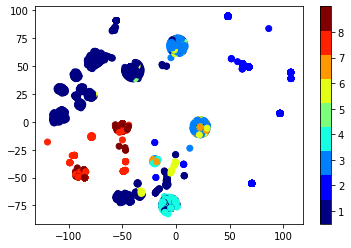

In [ ]:
xtsne=TSNE(perplexity=50)
results=xtsne.fit_transform(result_normd)
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.scatter(vis_x, vis_y, c=result_y, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(9))
plt.clim(0.5, 9)
plt.show()

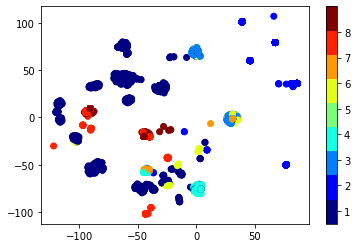

In [ ]:
xtsne=TSNE(perplexity=30)
results=xtsne.fit_transform(result_normd)
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.scatter(vis_x, vis_y, c=result_y, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(9))
plt.clim(0.5, 9)
plt.show()

### 8.4.2.Pixel intensity features + size_asm

In [ ]:
result_x = x.copy()
result_y = y
result_x = result_x.drop(['ID'], axis=1)
result_x.head()

,pix_0,pix_1,pix_2,pix_3,pix_4,pix_5,pix_6,pix_7,pix_8,pix_9,...,pix_791,pix_792,pix_793,pix_794,pix_795,pix_796,pix_797,pix_798,pix_799,size_asm
0,72,69,65,68,69,82,58,48,48,52,...,61,61,61,61,61,61,61,61,61,56.229886
1,46,116,101,120,116,58,48,48,52,48,...,54,32,40,80,69,41,13,10,46,13.999378
2,72,69,65,68,69,82,58,48,48,52,...,61,61,61,61,61,61,61,61,61,8.507785
3,72,69,65,68,69,82,58,49,48,48,...,111,100,101,108,32,102,108,97,116,0.078190
4,72,69,65,68,69,82,58,48,48,52,...,61,61,61,61,61,61,61,61,61,0.996723


In [ ]:
result_normd = normalize(result_x)
result_normd.head()

,pix_0,pix_1,pix_2,pix_3,pix_4,pix_5,pix_6,pix_7,pix_8,pix_9,...,pix_791,pix_792,pix_793,pix_794,pix_795,pix_796,pix_797,pix_798,pix_799,size_asm
0,0.481928,0.302632,0.000000,0.277778,0.291667,0.500000,1.0,0.000000,0.000000,0.181818,...,0.481481,0.481481,0.490566,0.525253,0.490566,0.490566,0.485981,0.460177,0.485981,0.400910
1,0.168675,0.921053,0.705882,1.000000,0.944444,0.147059,0.0,0.000000,0.181818,0.000000,...,0.416667,0.212963,0.292453,0.717172,0.566038,0.301887,0.037383,0.008850,0.345794,0.099719
2,0.481928,0.302632,0.000000,0.277778,0.291667,0.500000,1.0,0.000000,0.000000,0.181818,...,0.481481,0.481481,0.490566,0.525253,0.490566,0.490566,0.485981,0.460177,0.485981,0.060553
3,0.481928,0.302632,0.000000,0.277778,0.291667,0.500000,1.0,0.058824,0.000000,0.000000,...,0.944444,0.842593,0.867925,1.000000,0.216981,0.877358,0.925234,0.778761,1.000000,0.000432
4,0.481928,0.302632,0.000000,0.277778,0.291667,0.500000,1.0,0.000000,0.000000,0.181818,...,0.481481,0.481481,0.490566,0.525253,0.490566,0.490566,0.485981,0.460177,0.485981,0.006983


### 8.4.2.1 Visualize the data in 2d

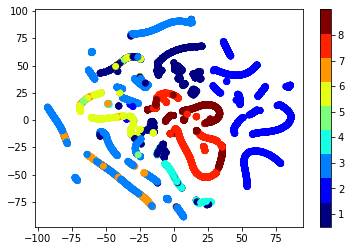

In [ ]:
xtsne=TSNE(perplexity=50)
results=xtsne.fit_transform(result_normd)
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.scatter(vis_x, vis_y, c=result_y, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(9))
plt.clim(0.5, 9)
plt.show()

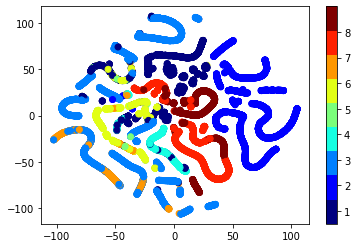

In [ ]:
xtsne=TSNE(perplexity=30)
results=xtsne.fit_transform(result_normd)
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.scatter(vis_x, vis_y, c=result_y, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(9))
plt.clim(0.5, 9)
plt.show()

### 8.4.3.Pixel intensity features + opcodes + asm_size

In [ ]:
# UMAP is a faster dimensionality reduction technique than T-SNE
!pip install umap-learn
import umap

### Remove column which have no data at all

In [ ]:
agg = result_x.aggregate(['sum'])
agg

,pix_0,pix_1,pix_2,pix_3,pix_4,pix_5,pix_6,pix_7,pix_8,pix_9,...,:dword,edx,esi,eax,ebx,ecx,edi,ebp,esp,eip
sum,720390,868832,797505,864617,861882,830300,605672,526186,539521,552890,...,38964309,14763198,24971136,16886515,18868351,9578968,1851,172151,288687,1322434


In [ ]:
for col,val in zip(agg.columns,agg.values[0]):
  if val == 0:
    print(col, val)

.BSS: 0.0
.CODE 0.0
rtn 0.0


In [ ]:
# From analysis, there are three columns which have zero values:
# .BSS: 0.0
# .CODE 0.0
# rtn 0.0
# So we are going to drop these from our data

In [ ]:
result_x = x_all.copy()
result_y = y_all
result_x = result_x.drop(['ID','.BSS:', '.CODE', 'rtn'], axis=1)
result_x.head()

,pix_0,pix_1,pix_2,pix_3,pix_4,pix_5,pix_6,pix_7,pix_8,pix_9,...,:dword,edx,esi,eax,ebx,ecx,edi,ebp,esp,eip
0,72,69,65,68,69,82,58,48,48,52,...,4371,808,2290,1281,587,701,0,15,14,456
1,46,116,101,120,116,58,48,48,52,48,...,1446,260,1090,391,905,420,0,24,22,227
2,72,69,65,68,69,82,58,48,48,52,...,903,5,547,5,451,56,0,27,0,117
3,72,69,65,68,69,82,58,49,48,48,...,137,18,66,15,43,83,0,17,48,29
4,72,69,65,68,69,82,58,48,48,52,...,1220,18,1228,24,1546,107,0,15,0,76


In [ ]:
result_normd = normalize(result_x)
result_normd.head()

,pix_0,pix_1,pix_2,pix_3,pix_4,pix_5,pix_6,pix_7,pix_8,pix_9,...,:dword,edx,esi,eax,ebx,ecx,edi,ebp,esp,eip
0,0.481928,0.302632,0.000000,0.277778,0.291667,0.500000,1.0,0.000000,0.000000,0.181818,...,0.032784,0.015418,0.025875,0.025744,0.004910,0.008930,0.0,0.027174,0.000428,0.049896
1,0.168675,0.921053,0.705882,1.000000,0.944444,0.147059,0.0,0.000000,0.181818,0.000000,...,0.010846,0.004961,0.012316,0.007858,0.007570,0.005350,0.0,0.043478,0.000673,0.024839
2,0.481928,0.302632,0.000000,0.277778,0.291667,0.500000,1.0,0.000000,0.000000,0.181818,...,0.006773,0.000095,0.006181,0.000100,0.003773,0.000713,0.0,0.048913,0.000000,0.012802
3,0.481928,0.302632,0.000000,0.277778,0.291667,0.500000,1.0,0.058824,0.000000,0.000000,...,0.001028,0.000343,0.000746,0.000301,0.000360,0.001057,0.0,0.030797,0.001468,0.003173
4,0.481928,0.302632,0.000000,0.277778,0.291667,0.500000,1.0,0.000000,0.000000,0.181818,...,0.009150,0.000343,0.013875,0.000482,0.012932,0.001363,0.0,0.027174,0.000000,0.008316


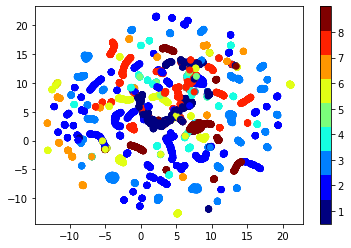

In [ ]:
# UMAP is faster than TSNE
reducer = umap.UMAP()
results=reducer.fit_transform(result_x)
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.scatter(vis_x, vis_y, c=result_y, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(9))
plt.clim(0.5, 9)
plt.show()

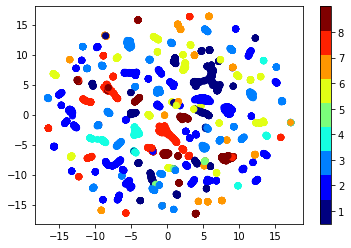

In [ ]:
reducer = umap.UMAP(n_neighbors=20)
results=reducer.fit_transform(result_normd)
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.scatter(vis_x, vis_y, c=result_y, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(9))
plt.clim(0.5, 9)
plt.show()

This visualization helps a lot in our task. We can clearly see that the datapoints appear in distinct clusters and this suggests that in the higher dimensions this will be easier for our model to classify.

## 8.5.Modelling with ASM pixel intensity features


We will try out two featurization combinations:
  * One with asm_pixel_intensity features alone
  * Another with the opcode count + pixel_intensity_features + size

### 8.5.1.Featurization 1 - pixel_intensity only

#### 8.5.1.0.Train Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x,y,stratify=y,test_size=0.1, random_state = 663)

In [ ]:
X_train, X_cv, y_train, y_cv = train_test_split(X_train,y_train,stratify=y_train,test_size=0.1, random_state = 663)

In [ ]:
X_train.shape, X_cv.shape, X_test.shape

((8802, 803), (979, 803), (1087, 803))

In [ ]:
# Lets save the train,cv and test ids so that we can use it for other models
train_ids, cv_ids, test_ids = X_train['ID'].values, X_cv['ID'].values, X_test['ID'].values
pickle.dump((train_ids, cv_ids, test_ids), open('/content/drive/MyDrive/AAIC_Assignments/MicrosoftMalware/train_cv_test_ids.pkl','wb'))

In [ ]:
X_test.head()

,ID,pix_0,pix_1,pix_2,pix_3,pix_4,pix_5,pix_6,pix_7,pix_8,...,pix_791,pix_792,pix_793,pix_794,pix_795,pix_796,pix_797,pix_798,pix_799,size_asm
5500,cmHUGkYuylEFdKDMjL9o,72,69,65,68,69,82,58,49,48,...,111,100,101,108,32,102,108,97,116,1.991923
10718,I09WMFrpLYEUNljGZeBt,72,69,65,68,69,82,58,48,48,...,111,100,101,108,32,102,108,97,116,0.172915
2381,6TtolMFBK9Q8pEIXvbNc,46,116,101,120,116,58,48,48,52,...,54,32,40,80,69,41,13,10,46,97.812878
76,0D9IedmC1viTPugLRWX6,72,69,65,68,69,82,58,48,48,...,61,61,61,61,61,61,61,61,61,0.172854
2196,6E78GVaCMig3mTz1oFb0,72,69,65,68,69,82,58,48,48,...,61,61,61,61,61,61,61,61,61,0.119271


In [ ]:
X_train_asm = X_train.drop(['size_asm',"ID"],axis=1)
X_cv_asm = X_cv.drop(['size_asm',"ID"],axis=1)
X_test_asm = X_test.drop(['size_asm',"ID"],axis=1)

In [ ]:
X_train_asm.head()

,pix_0,pix_1,pix_2,pix_3,pix_4,pix_5,pix_6,pix_7,pix_8,pix_9,...,pix_791,pix_792,pix_793,pix_794,pix_795,pix_796,pix_797,pix_798,pix_799,Class
3968,72,69,65,68,69,82,58,48,48,52,...,111,100,101,108,32,102,108,97,116,3
7346,72,69,65,68,69,82,58,49,48,48,...,111,100,101,108,32,102,108,97,116,1
10303,72,69,65,68,69,82,58,49,48,48,...,111,100,101,108,32,102,108,97,116,1
900,72,69,65,68,69,82,58,48,48,52,...,61,61,61,61,61,61,61,61,61,8
492,72,69,65,68,69,82,58,49,48,48,...,111,100,101,108,32,102,108,97,116,1


#### 8.5.1.1 Random Forest Classifier

100%|██████████| 7/7 [06:55<00:00, 59.35s/it] 


log_loss for n_estimators =  10 is 0.00712767733909466
log_loss for n_estimators =  50 is 0.0066907484619653694
log_loss for n_estimators =  100 is 0.006589318989856586
log_loss for n_estimators =  500 is 0.006614645997645779
log_loss for n_estimators =  1000 is 0.006636240633244747
log_loss for n_estimators =  2000 is 0.006612934768697988
log_loss for n_estimators =  3000 is 0.006625498806111706


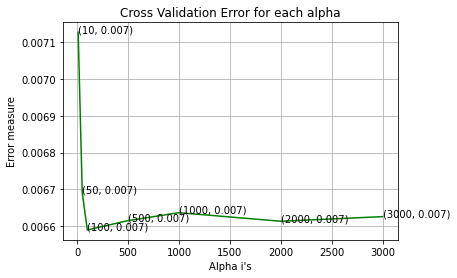

In [ ]:
# The values of n_estimators that we are going to try
alpha=[10,50,100,500,1000,2000,3000]

cv_log_error_array=[]
from sklearn.ensemble import RandomForestClassifier

# Fit exery_model asmd
for i in tqdm(alpha):
    r_cfl=RandomForestClassifier(n_estimators=i,random_state=42,n_jobs=-1)
    r_cfl.fit(X_train_asm,y_train)

    sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
    sig_clf.fit(X_train_asm,y_train)
    
    predict_y = sig_clf.predict_proba(X_cv_asm)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=r_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for n_estimators = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


In [ ]:
alpha[best_alpha]

100

In [ ]:
# Fit model using best_alpha

r_cfl=RandomForestClassifier(n_estimators=alpha[best_alpha],random_state=42,n_jobs=-1)
r_cfl.fit(X_train_asm,y_train)

sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
sig_clf.fit(X_train_asm,y_train)

predict_y = sig_clf.predict_proba(X_train_asm)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y))
predict_y = sig_clf.predict_proba(X_cv_asm)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y))
predict_y = sig_clf.predict_proba(X_test_asm)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y))

For values of best alpha =  100 The train log loss is: 0.006252034872280114
For values of best alpha =  100 The cross validation log loss is: 0.006589318989856586
For values of best alpha =  100 The test log loss is: 0.006353573575941921


Number of misclassified points  0.0
-------------------------------------------------- Confusion matrix --------------------------------------------------


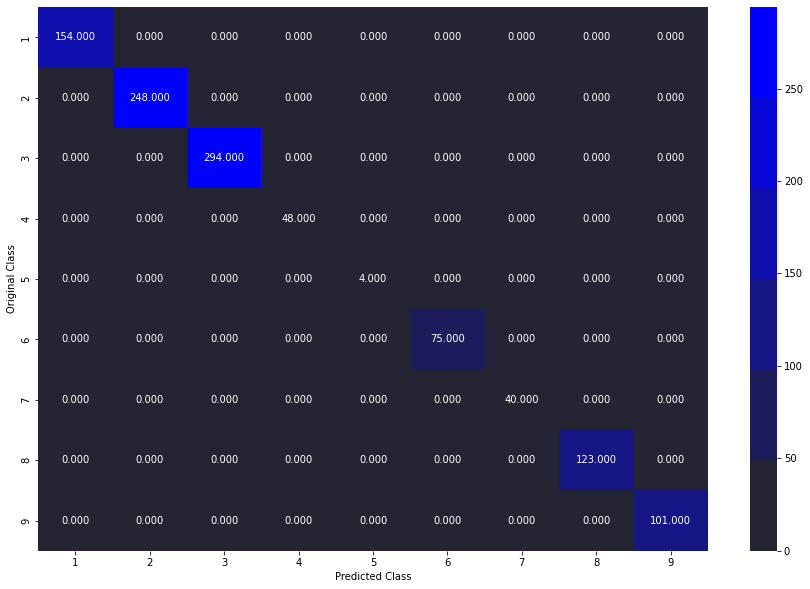

-------------------------------------------------- Precision matrix --------------------------------------------------


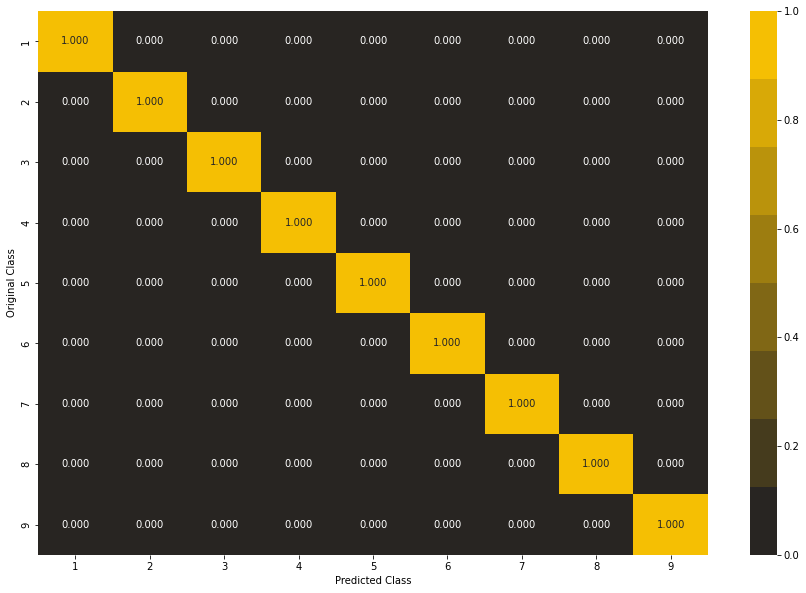

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


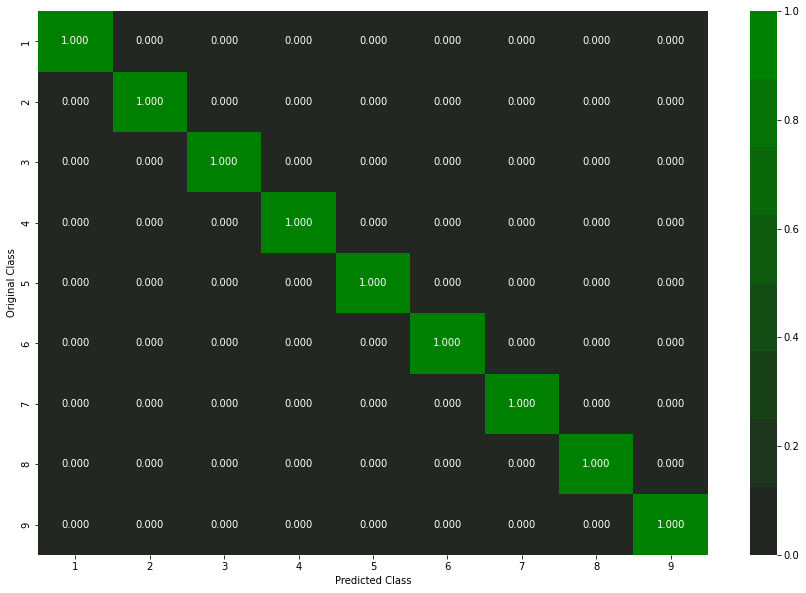

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
plot_confusion_matrix(y_test, sig_clf.predict(X_test_asm))

#### 8.5.1.2 XGBoost Classifier

In [ ]:
# For XGB, we cannot pass the labels as 1,2,...,9.
# We have to pass it either as 0,1,...,8 i.e. label encode it
# We are going to label encode the values

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

y_train_asm = le.fit_transform(y_train)
y_test_asm = le.fit_transform(y_test)
y_cv_asm = le.fit_transform(y_cv)

In [ ]:
# Original y_train values
y_train.values

array([3, 1, 1, ..., 2, 3, 6])

In [ ]:
# Label_encoded y_train values. Its basically original_label-1
y_train_asm

array([2, 0, 0, ..., 1, 2, 5])

100%|██████████| 7/7 [07:19<00:00, 62.77s/it] 


log_loss for n_estimators =  10 is 0.005473734738824454
log_loss for n_estimators =  50 is 0.005284595367238628
log_loss for n_estimators =  100 is 0.0052806799320012105
log_loss for n_estimators =  500 is 0.005275276637308677
log_loss for n_estimators =  1000 is 0.00527421891591823
log_loss for n_estimators =  2000 is 0.005274358578911243
log_loss for n_estimators =  3000 is 0.005274667929147751


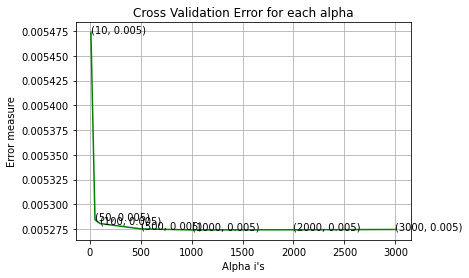

In [ ]:
alpha=[10,50,100,500,1000,2000,3000]

cv_log_error_array=[]

for i in tqdm(alpha):

    # XGBClassifier
    x_cfl=XGBClassifier(n_estimators=i, tree_method='gpu_hist')
    x_cfl.fit(X_train_asm,y_train_asm)

    # Calibrated Classifier
    sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
    sig_clf.fit(X_train_asm,y_train_asm)
    
    predict_y = sig_clf.predict_proba(X_cv_asm)
    cv_log_error_array.append(log_loss(y_cv_asm, predict_y, labels=x_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for n_estimators = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

In [ ]:
alpha[best_alpha]

1000

In [ ]:
x_cfl = XGBClassifier(n_estimators=alpha[best_alpha],tree_method='gpu_hist')
x_cfl.fit(X_train_asm,y_train_asm,verbose=True)

sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(X_train_asm,y_train_asm)

predict_y = sig_clf.predict_proba(X_train_asm)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_asm, predict_y))
predict_y = sig_clf.predict_proba(X_cv_asm)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv_asm, predict_y))
predict_y = sig_clf.predict_proba(X_test_asm)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_asm, predict_y))

For values of best alpha =  1000 The train log loss is: 0.005299997830700635
For values of best alpha =  1000 The cross validation log loss is: 0.00527421891591823
For values of best alpha =  1000 The test log loss is: 0.005274141569274867


Number of misclassified points  0.0
-------------------------------------------------- Confusion matrix --------------------------------------------------


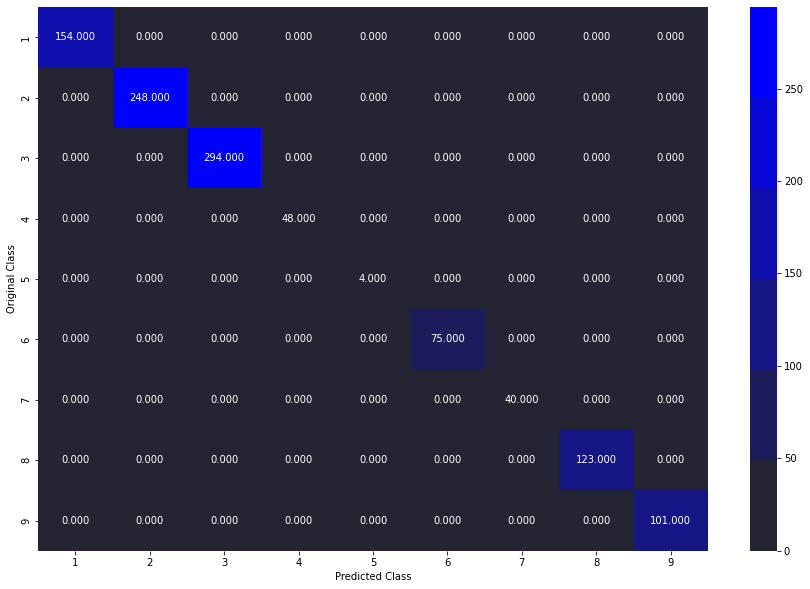

-------------------------------------------------- Precision matrix --------------------------------------------------


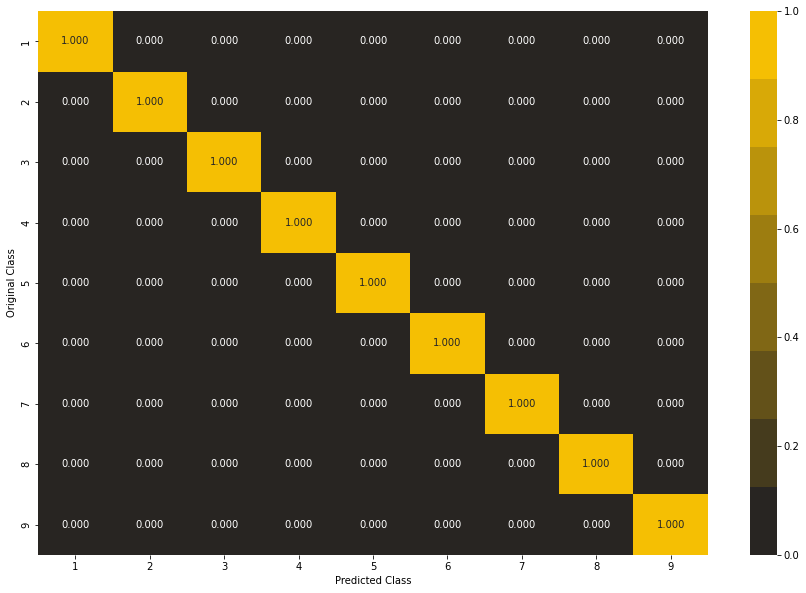

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


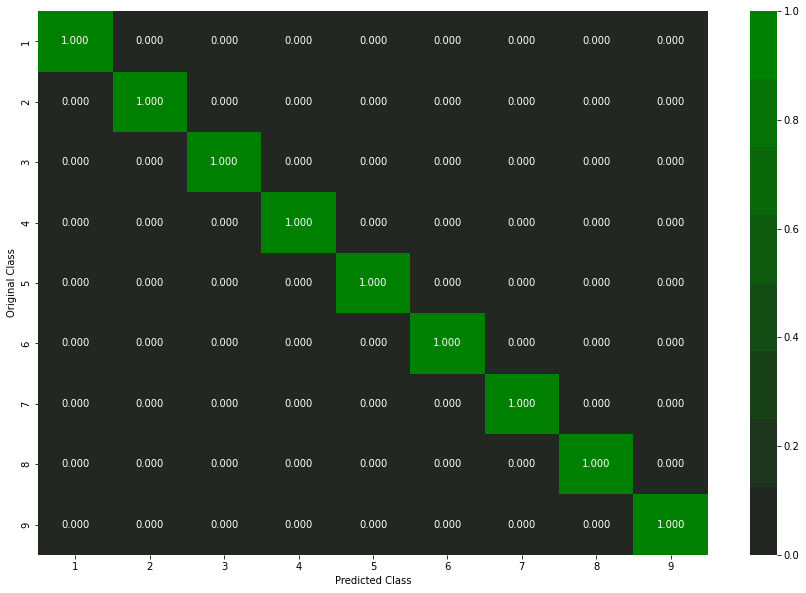

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
plot_confusion_matrix(y_test_asm, sig_clf.predict(X_test_asm))

### 8.5.2.Featurization 2 - size + asm_pixel_intensity + opcodes

#### 8.5.2.0.Train Test Split

For tree based model its **NOT** required for us to normalize the data as they do not use distance based metrics to build the trees.

In [ ]:
x_all.head()

,ID,pix_0,pix_1,pix_2,pix_3,pix_4,pix_5,pix_6,pix_7,pix_8,...,:dword,edx,esi,eax,ebx,ecx,edi,ebp,esp,eip
0,01azqd4InC7m9JpocGv5,72,69,65,68,69,82,58,48,48,...,4371,808,2290,1281,587,701,0,15,14,456
1,01IsoiSMh5gxyDYTl4CB,46,116,101,120,116,58,48,48,52,...,1446,260,1090,391,905,420,0,24,22,227
2,01jsnpXSAlgw6aPeDxrU,72,69,65,68,69,82,58,48,48,...,903,5,547,5,451,56,0,27,0,117
3,01kcPWA9K2BOxQeS5Rju,72,69,65,68,69,82,58,49,48,...,137,18,66,15,43,83,0,17,48,29
4,01SuzwMJEIXsK7A8dQbl,72,69,65,68,69,82,58,48,48,...,1220,18,1228,24,1546,107,0,15,0,76


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_all,y,stratify=y_all,test_size=0.1, random_state = 663)

In [ ]:
X_train, X_cv, y_train, y_cv = train_test_split(X_train,y_train,stratify=y_train,test_size=0.1, random_state = 663)

In [ ]:
X_train.shape, X_cv.shape, X_test.shape

((8802, 853), (979, 853), (1087, 853))

In [ ]:
# Lets save the train,cv and test ids so that we can use it for other models
train_ids, cv_ids, test_ids = X_train['ID'].values, X_cv['ID'].values, X_test['ID'].values
pickle.dump((train_ids, cv_ids, test_ids), open('/content/drive/MyDrive/AAIC_Assignments/MicrosoftMalware/train_cv_test_ids.pkl','wb'))

In [ ]:
X_test.head()

,ID,pix_0,pix_1,pix_2,pix_3,pix_4,pix_5,pix_6,pix_7,pix_8,...,:dword,edx,esi,eax,ebx,ecx,edi,ebp,esp,eip
5500,cmHUGkYuylEFdKDMjL9o,72,69,65,68,69,82,58,49,48,...,5056,1199,2461,1879,3407,678,0,22,0,103
10718,I09WMFrpLYEUNljGZeBt,72,69,65,68,69,82,58,48,48,...,179,63,137,216,145,272,0,12,0,39
2381,6TtolMFBK9Q8pEIXvbNc,46,116,101,120,116,58,48,48,52,...,1145,299,888,433,1038,246,0,21,22,171
76,0D9IedmC1viTPugLRWX6,72,69,65,68,69,82,58,48,48,...,129,72,85,219,148,272,0,12,0,39
2196,6E78GVaCMig3mTz1oFb0,72,69,65,68,69,82,58,48,48,...,50,43,77,126,48,76,0,12,0,39


In [ ]:
X_train = X_train.drop(["ID"],axis=1)
X_cv = X_cv.drop(["ID"],axis=1)
X_test = X_test.drop(["ID"],axis=1)

#### 8.5.2.1 Random Forest Classifier

100%|██████████| 7/7 [06:32<00:00, 56.00s/it]


log_loss for n_estimators =  10 is 0.024695033031230027
log_loss for n_estimators =  50 is 0.020032993731803932
log_loss for n_estimators =  100 is 0.01842618132495102
log_loss for n_estimators =  500 is 0.018847132367606906
log_loss for n_estimators =  1000 is 0.018735388853502944
log_loss for n_estimators =  2000 is 0.018710013821025277
log_loss for n_estimators =  3000 is 0.018769037119448797


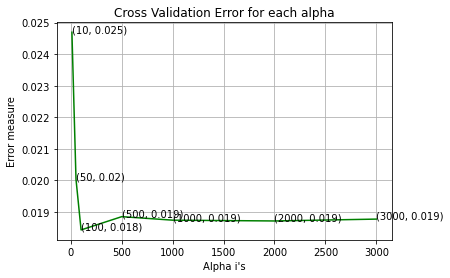

In [ ]:
# The values of n_estimators that we are going to try
alpha=[10,50,100,500,1000,2000,3000]

cv_log_error_array=[]
from sklearn.ensemble import RandomForestClassifier

# Fit exery_model asmd
for i in tqdm(alpha):
    r_cfl=RandomForestClassifier(n_estimators=i,n_jobs=-1)
    r_cfl.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
    sig_clf.fit(X_train,y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=r_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for n_estimators = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


In [ ]:
# Fit model using best_alpha

r_cfl=RandomForestClassifier(n_estimators=alpha[best_alpha],random_state=42,n_jobs=-1)
r_cfl.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
sig_clf.fit(X_train,y_train)

predict_y = sig_clf.predict_proba(X_train)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y))

For values of best alpha =  100 The train log loss is: 0.009017028765639668
For values of best alpha =  100 The cross validation log loss is: 0.01842618132495102
For values of best alpha =  100 The test log loss is: 0.01935058536574226


Number of misclassified points  0.36798528058877644
-------------------------------------------------- Confusion matrix --------------------------------------------------


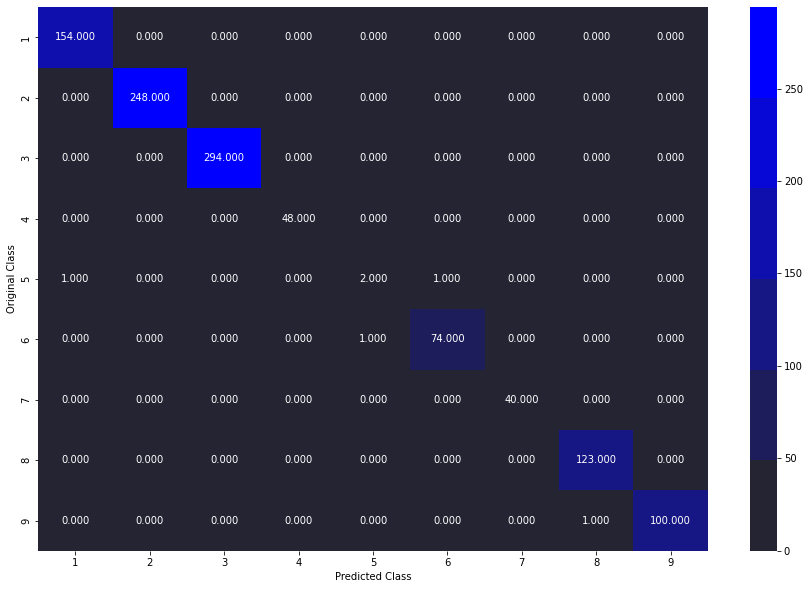

-------------------------------------------------- Precision matrix --------------------------------------------------


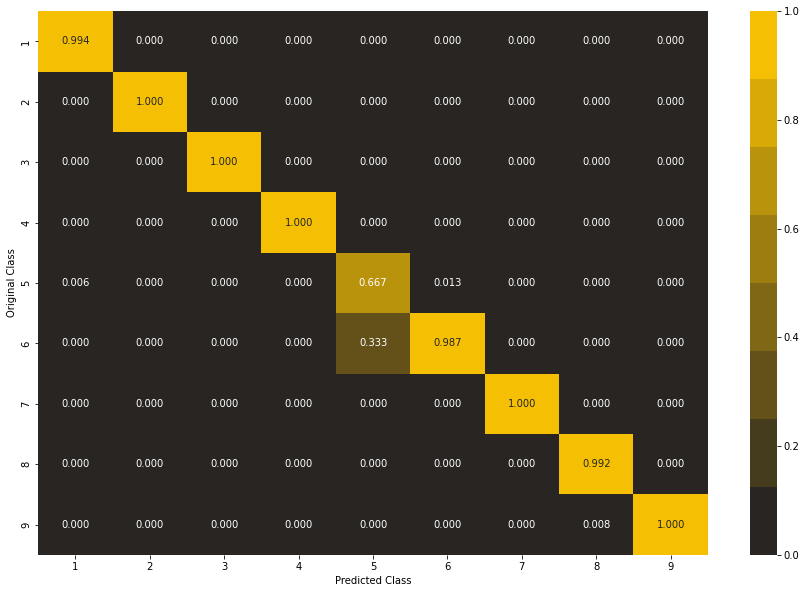

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


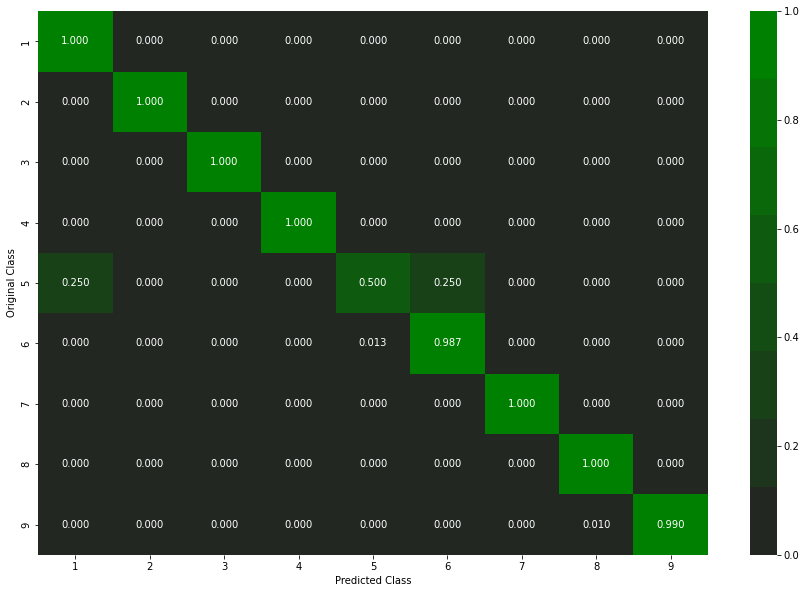

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
plot_confusion_matrix(y_test, sig_clf.predict(X_test))

********** NOTE **********

In the case-study we have the best test log-loss for *asm + bytefile* features of 0.031.

Here the test loss is 0.01935 which is much better as compared to the models dicussed in the case-study. And this is only with asm features.

If we combine the byte file features this may reduce further.


#### 8.5.2.2 XGBoost Classifier

In [ ]:
# For XGB, we cannot pass the labels as 1,2,...,9.
# We have to pass it either as 0,1,...,8 i.e. label encode it
# We are going to label encode the values

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

y_train_le = le.fit_transform(y_train)
y_test_le = le.fit_transform(y_test)
y_cv_le = le.fit_transform(y_cv)

In [ ]:
# Original y_train values
y_train.values

array([3, 1, 1, ..., 2, 3, 6])

In [ ]:
# Label_encoded y_train values. Its basically original_label-1
y_train_le

array([2, 0, 0, ..., 1, 2, 5])

100%|██████████| 7/7 [08:49<00:00, 75.65s/it] 


log_loss for n_estimators =  10 is 0.026868305953009382
log_loss for n_estimators =  50 is 0.021263418796627544
log_loss for n_estimators =  100 is 0.02014538491116445
log_loss for n_estimators =  500 is 0.01675621054112765
log_loss for n_estimators =  1000 is 0.016401648625109518
log_loss for n_estimators =  2000 is 0.016400675076824783
log_loss for n_estimators =  3000 is 0.016401052110622625


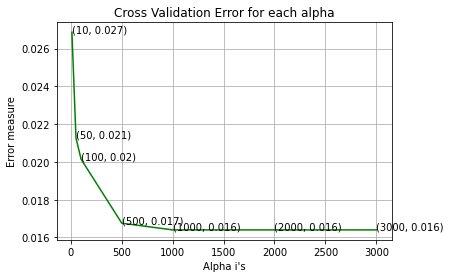

In [ ]:
alpha=[10,50,100,500,1000,2000,3000]

cv_log_error_array=[]

for i in tqdm(alpha):
    x_cfl=XGBClassifier(n_estimators=i,tree_method='gpu_hist')
    x_cfl.fit(X_train,y_train_le)
    sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
    sig_clf.fit(X_train,y_train_le)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv_le, predict_y, labels=x_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for n_estimators = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

In [ ]:
alpha[best_alpha]

2000

In [ ]:
# Training the model with the best_parameter
x_cfl = XGBClassifier(n_estimators=alpha[best_alpha],tree_method='gpu_hist')
x_cfl.fit(X_train,y_train_le,verbose=True)

sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(X_train,y_train_le)

predict_y = sig_clf.predict_proba(X_train)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_le, predict_y))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv_le, predict_y))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_le, predict_y))

For values of best alpha =  2000 The train log loss is: 0.008122493876183332
For values of best alpha =  2000 The cross validation log loss is: 0.016400675076824783
For values of best alpha =  2000 The test log loss is: 0.020160454705550456


Number of misclassified points  0.27598896044158233
-------------------------------------------------- Confusion matrix --------------------------------------------------


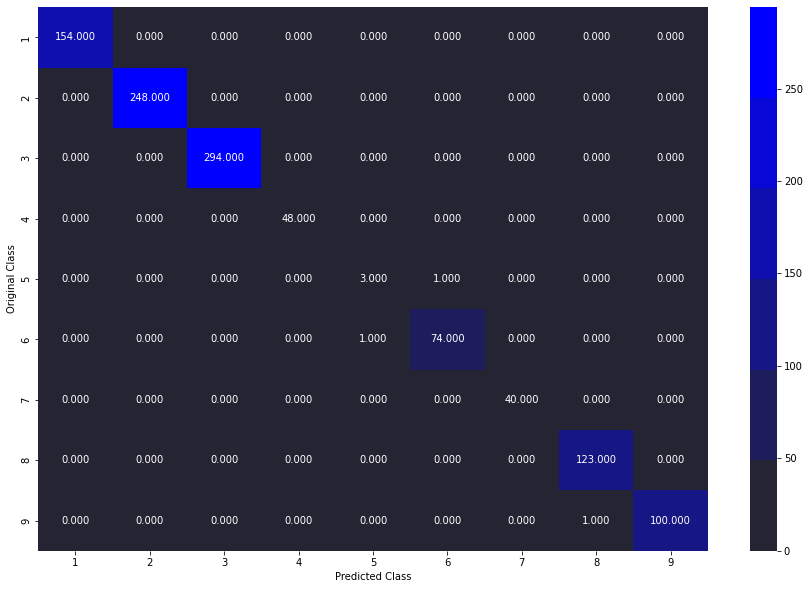

-------------------------------------------------- Precision matrix --------------------------------------------------


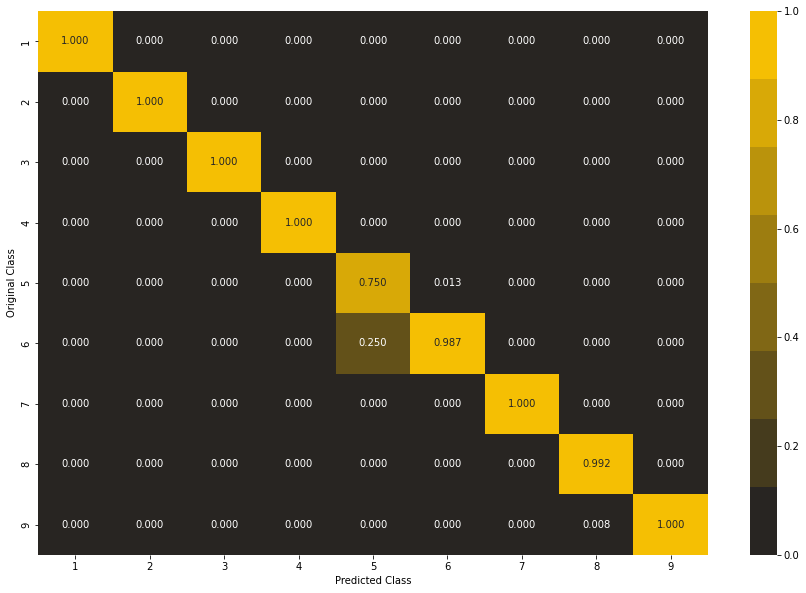

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


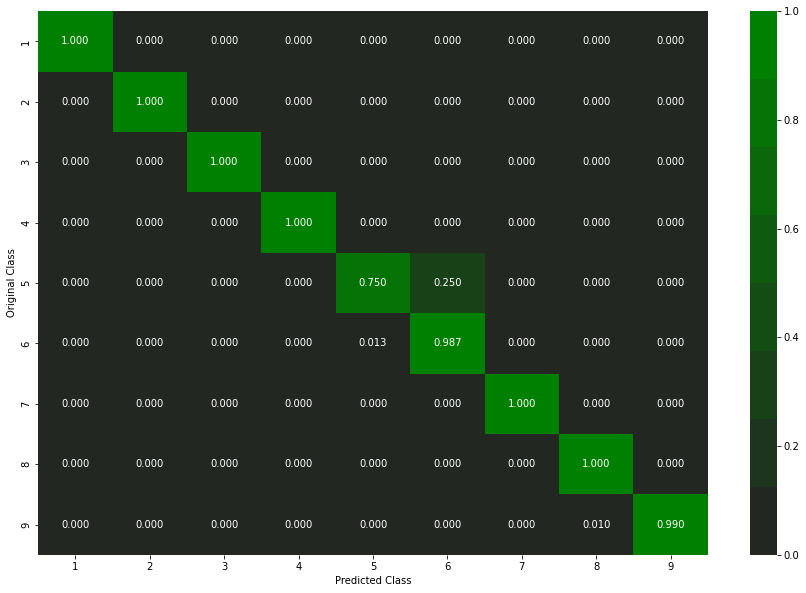

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
plot_confusion_matrix(y_test_le, sig_clf.predict(X_test))

# 9.ALL FEATURES
# ASM[pix+size_asm+opcodes] + BYTE[size+unigrams+bigrams]

## 9.1.Data Prep

In [ ]:
# Preview of X_Train bytefile dataframe
X_train_unibi.head()

,ID,00 00,00 01,00 02,00 04,00 05,00 06,00 07,00 09,00 0C,...,f9,fa,fb,fc,fd,fe,ff,??,size,Class
0,CL7wiUdlhOvgaJesfrmW,9158,615,146,549,598,542,144,154,576,...,2440,2635,2568,2341,2677,2811,50083,364,3.887939,9
1,5AsUO9gZ8KxIycz6Tmr3,15584,769,91,5993,61,46,54,24,56,...,306,230,208,15926,555,15353,62284,10092,7.357178,2
2,3Dm4fWY9chQxpnqAw5XJ,9635,50,26,12,11,1,2,3,5,...,243,233,275,651,224,266,1855,5836,0.358887,8
3,cuQANt4oBpMzmYKRkGf6,2042,21,92,11,2,32,13,1,0,...,16,31,83,64,15,133,797,1451188,4.270752,7
4,9PujO15SAeBy6EZNpanJ,860,15,9,7,10,7,5,8,7,...,1704,1970,1697,1674,1690,1684,2106,12176,1.351807,6


In [ ]:
# Preview of ASM dataframe
x_all.head()

,ID,pix_0,pix_1,pix_2,pix_3,pix_4,pix_5,pix_6,pix_7,pix_8,...,:dword,edx,esi,eax,ebx,ecx,edi,ebp,esp,eip
0,01azqd4InC7m9JpocGv5,72,69,65,68,69,82,58,48,48,...,4371,808,2290,1281,587,701,0,15,14,456
1,01IsoiSMh5gxyDYTl4CB,46,116,101,120,116,58,48,48,52,...,1446,260,1090,391,905,420,0,24,22,227
2,01jsnpXSAlgw6aPeDxrU,72,69,65,68,69,82,58,48,48,...,903,5,547,5,451,56,0,27,0,117
3,01kcPWA9K2BOxQeS5Rju,72,69,65,68,69,82,58,49,48,...,137,18,66,15,43,83,0,17,48,29
4,01SuzwMJEIXsK7A8dQbl,72,69,65,68,69,82,58,48,48,...,1220,18,1228,24,1546,107,0,15,0,76


We have the splits for the train, cv and test datasets corresponding to the Bytefile dataframse. So we are going to use it to split ASM dataset too. We will stack all the remaining columns in the dataframe corresponding to the matching IDS in the train, cv and test set.

In [ ]:
# Merge the ASM and bytefile features
X_train_all = pd.merge(X_train_unibi,x_all,on='ID', how='left')
X_cv_all = pd.merge(X_cv_unibi,x_all,on='ID', how='left')
X_test_all = pd.merge(X_test_unibi,x_all,on='ID', how='left')

# y_values
y_train_all = X_train_all['Class']
y_cv_all = X_cv_all['Class']
y_test_all = X_test_all['Class']


# Drop the class values
X_train_all.drop(['ID','Class'],axis=1,inplace=True)
X_cv_all.drop(['ID','Class'],axis=1,inplace=True)
X_test_all.drop(['ID','Class'],axis=1,inplace=True)


In [ ]:
X_train_all.head()

,ID,00 00,00 01,00 02,00 04,00 05,00 06,00 07,00 09,00 0C,...,:dword,edx,esi,eax,ebx,ecx,edi,ebp,esp,eip
0,CL7wiUdlhOvgaJesfrmW,9158,615,146,549,598,542,144,154,576,...,1616,5,1054,5,742,60,0,15,0,91
1,5AsUO9gZ8KxIycz6Tmr3,15584,769,91,5993,61,46,54,24,56,...,498,131,341,161,414,307,0,10,0,91
2,3Dm4fWY9chQxpnqAw5XJ,9635,50,26,12,11,1,2,3,5,...,1251,24,1173,30,1518,105,0,12,0,51
3,cuQANt4oBpMzmYKRkGf6,2042,21,92,11,2,32,13,1,0,...,46,92,28,127,81,1,0,4,0,0
4,9PujO15SAeBy6EZNpanJ,860,15,9,7,10,7,5,8,7,...,559,306,325,278,603,157,0,10,0,100


## 9.2.Visualize the Train_data

In [ ]:
# Prepare data for visualization, normalize it so that scale does not vary across features
result_x = X_train_all.copy()
result_y = y_train_unibi
result_x = normalize_df(result_x)

result_x.head()

,00 00,00 01,00 02,00 04,00 05,00 06,00 07,00 09,00 0C,00 0D,...,:dword,edx,esi,eax,ebx,ecx,edi,ebp,esp,eip
0,0.008008,0.048868,0.009330,0.037826,0.065113,0.049584,0.018154,0.006942,0.029900,0.004597,...,0.012121,0.000095,0.011910,0.000100,0.008532,0.000764,0.0,0.034404,0.0,0.009957
1,0.013628,0.061104,0.005815,0.412912,0.006642,0.004208,0.006808,0.001082,0.002907,0.000568,...,0.003735,0.002500,0.003853,0.003236,0.004760,0.003911,0.0,0.022936,0.0,0.009957
2,0.008425,0.003973,0.001661,0.000827,0.001198,0.000091,0.000252,0.000135,0.000260,0.000074,...,0.009383,0.000458,0.013254,0.000603,0.017455,0.001338,0.0,0.027523,0.0,0.005580
3,0.001786,0.001669,0.005879,0.000758,0.000218,0.002927,0.001639,0.000045,0.000000,0.000000,...,0.000345,0.001755,0.000316,0.002552,0.000931,0.000013,0.0,0.009174,0.0,0.000000
4,0.000752,0.001192,0.000575,0.000482,0.001089,0.000640,0.000630,0.000361,0.000363,0.000173,...,0.004193,0.005839,0.003672,0.005587,0.006934,0.002000,0.0,0.022936,0.0,0.010942


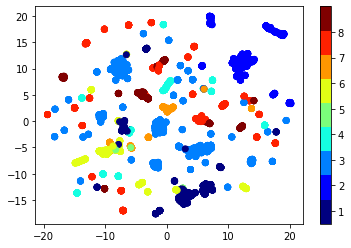

In [ ]:
# UMAP is faster than TSNE
reducer = umap.UMAP()
results=reducer.fit_transform(result_x)
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.scatter(vis_x, vis_y, c=result_y, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(9))
plt.clim(0.5, 9)
plt.show()

## 9.3.Model fit

### 9.3.1.Random Forest Classifier

100%|██████████| 7/7 [29:44<00:00, 254.95s/it]


log_loss for n_estimators =  10 is 0.02974678644807174
log_loss for n_estimators =  50 is 0.02406914735277017
log_loss for n_estimators =  100 is 0.025255204580995647
log_loss for n_estimators =  500 is 0.025972139537112898
log_loss for n_estimators =  1000 is 0.02656826101670426
log_loss for n_estimators =  2000 is 0.02701908236203462
log_loss for n_estimators =  3000 is 0.02690840541987464


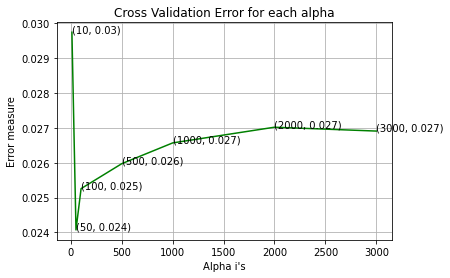

In [ ]:
# The values of n_estimators that we are going to try
alpha=[10,50,100,500,1000,2000,3000]

cv_log_error_array=[]
from sklearn.ensemble import RandomForestClassifier

# Fit exery_model asmd
for i in tqdm(alpha):
    r_cfl=RandomForestClassifier(n_estimators=i,random_state=42,n_jobs=-1)
    r_cfl.fit(X_train_all,y_train_all)

    sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
    sig_clf.fit(X_train_all,y_train_all)

    predict_y = sig_clf.predict_proba(X_cv_all)
    cv_log_error_array.append(log_loss(y_cv_all, predict_y, labels=r_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for n_estimators = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

In [ ]:
# Fit model using best_alpha

r_cfl=RandomForestClassifier(n_estimators=alpha[best_alpha],random_state=42,n_jobs=-1)
r_cfl.fit(X_train_all,y_train_all)

sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
sig_clf.fit(X_train_all,y_train_all)

predict_y = sig_clf.predict_proba(X_train_all)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_all, predict_y))

predict_y = sig_clf.predict_proba(X_cv_all)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv_all, predict_y))

predict_y = sig_clf.predict_proba(X_test_all)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_all, predict_y))

For values of best alpha =  50 The train log loss is: 0.008732583379991847
For values of best alpha =  50 The cross validation log loss is: 0.02406914735277017
For values of best alpha =  50 The test log loss is: 0.012891691144801065


Number of misclassified points  0.0
-------------------------------------------------- Confusion matrix --------------------------------------------------


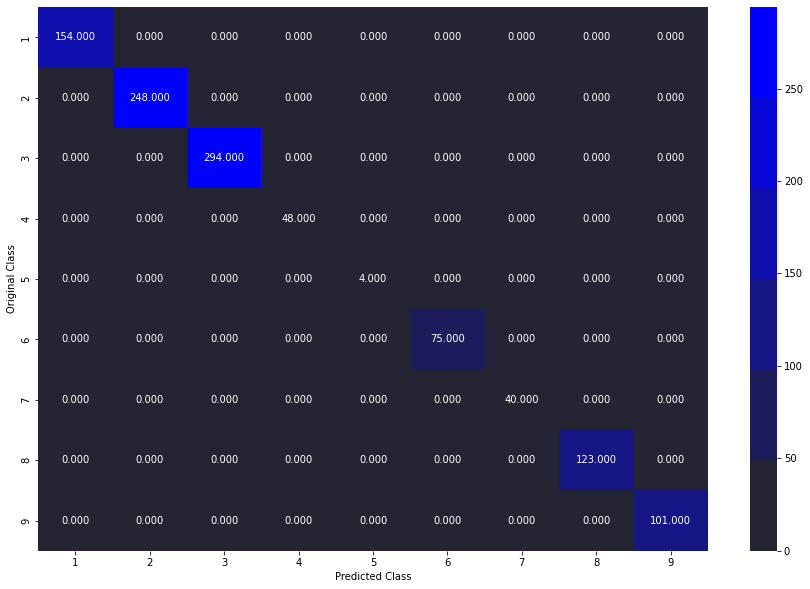

-------------------------------------------------- Precision matrix --------------------------------------------------


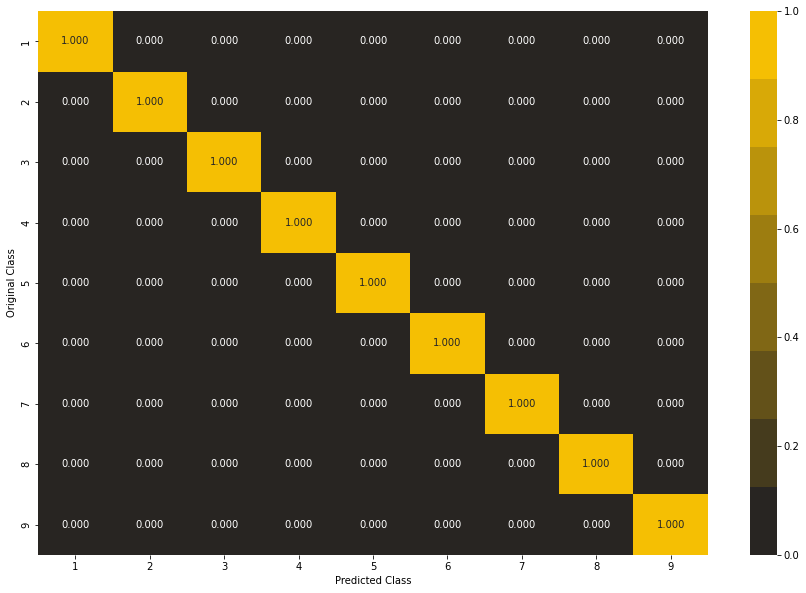

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


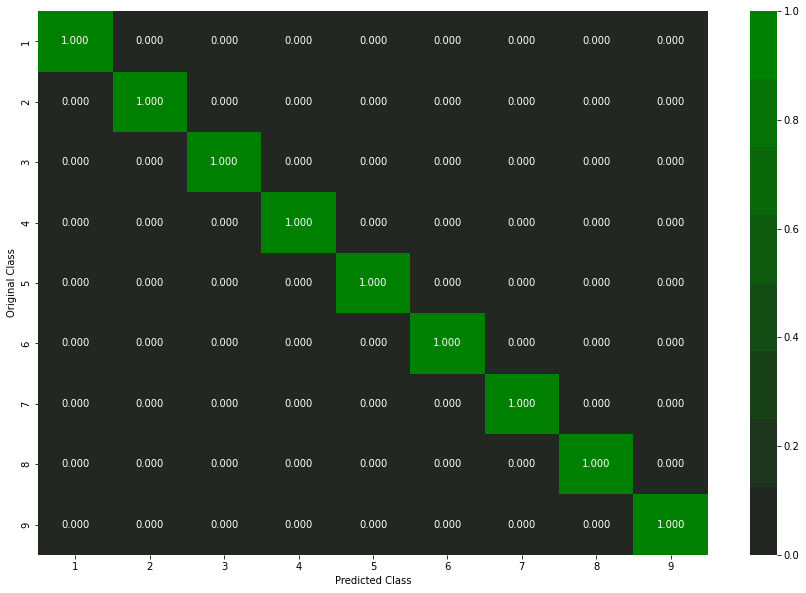

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
plot_confusion_matrix(y_test_all, sig_clf.predict(X_test_all))

### 9.3.2.XGBoost Classifier

In [ ]:
# For XGB, we cannot pass the labels as 1,2,...,9.
# We have to pass it either as 0,1,...,8 i.e. label encode it
# We are going to label encode the values

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

y_train_le = le.fit_transform(y_train_all)
y_test_le = le.fit_transform(y_test_all)
y_cv_le = le.fit_transform(y_cv_all)

In [ ]:
# Original y_train values
y_train_all.values

array([9, 2, 8, ..., 3, 4, 2])

In [ ]:
# Label_encoded y_train values. Its basically original_label-1
y_train_le

array([8, 1, 7, ..., 2, 3, 1])

100%|██████████| 7/7 [30:07<00:00, 258.22s/it]


log_loss for n_estimators =  10 is 0.03976119766930081
log_loss for n_estimators =  50 is 0.032335675750923935
log_loss for n_estimators =  100 is 0.030698199252330347
log_loss for n_estimators =  500 is 0.03069214223605481
log_loss for n_estimators =  1000 is 0.030691741330232853
log_loss for n_estimators =  2000 is 0.030692157087671656
log_loss for n_estimators =  3000 is 0.03069133240914066


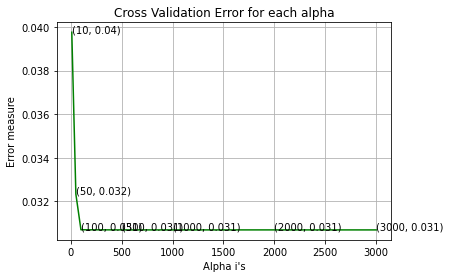

In [ ]:
alpha=[10,50,100,500,1000,2000,3000]

cv_log_error_array=[]

for i in tqdm(alpha):
    
    x_cfl=XGBClassifier(n_estimators=i,tree_method='gpu_hist')
    x_cfl.fit(X_train_all,y_train_le)

    sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
    sig_clf.fit(X_train_all,y_train_le)
    
    predict_y = sig_clf.predict_proba(X_cv_all)
    cv_log_error_array.append(log_loss(y_cv_le, predict_y, labels=x_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for n_estimators = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

In [ ]:
alpha[best_alpha] = 3000

In [ ]:
# Training the model with the best_parameter

x_cfl = XGBClassifier(n_estimators=alpha[best_alpha],tree_method='gpu_hist')
x_cfl.fit(X_train_all, y_train_le, verbose=True)

sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(X_train_all, y_train_le)

predict_y = sig_clf.predict_proba(X_train_all)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_le, predict_y))

predict_y = sig_clf.predict_proba(X_cv_all)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv_le, predict_y))

predict_y = sig_clf.predict_proba(X_test_all)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_le, predict_y))

For values of best alpha =  3000 The train log loss is: 0.00782763677257039
For values of best alpha =  3000 The cross validation log loss is: 0.03069133240914066
For values of best alpha =  3000 The test log loss is: 0.02659065258612133


Number of misclassified points  0.5519779208831647
-------------------------------------------------- Confusion matrix --------------------------------------------------


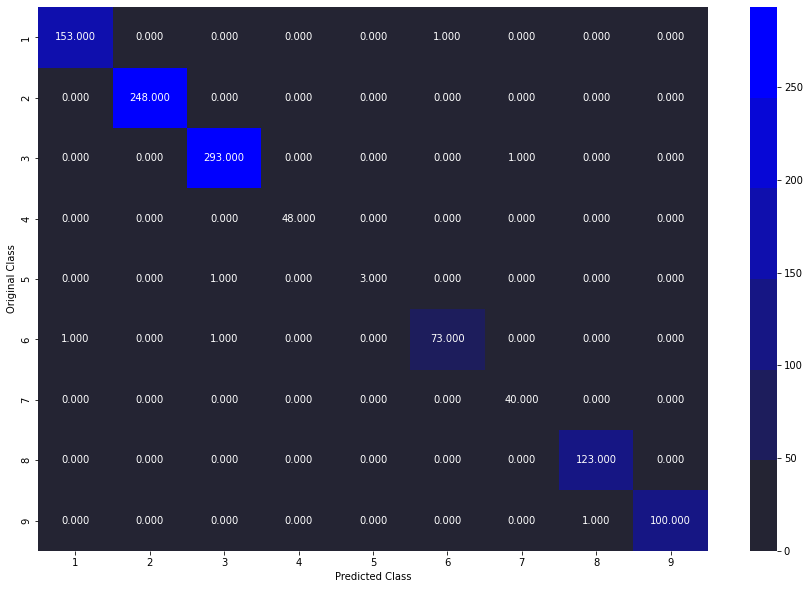

-------------------------------------------------- Precision matrix --------------------------------------------------


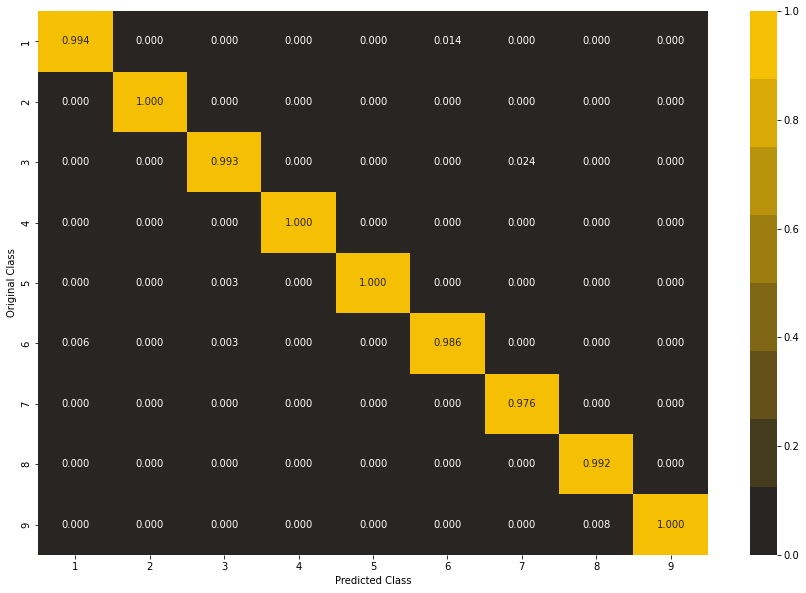

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


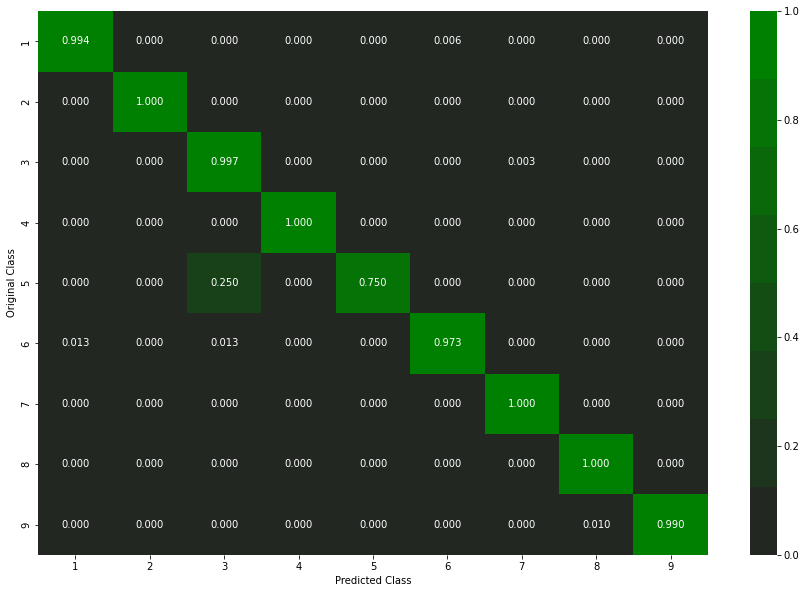

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
plot_confusion_matrix(y_test_le, sig_clf.predict(X_test_all))

## 9.4.Summary of Model Fit

* From the above two model considering all the features into account we can see that the Random Forest model produces the best results with __test log-loss of 0.0129__ and __% of misclassified points ~ 0.0%__ which is quite good. 

# 10.Procedure - Bigrams-byte files

1. Extraction bi-gram features
  * Unzip the train.7z to get the .byte files. We have 10868 .byte files. 
  * Parse through each of these files to get all possible bi-gram features. This step is like the fit function of the CountVectorizer where we pass the data to the function to find all the possible bi-grams from the data. And then use the transform function to get the counts of bigrams.
  * For extraction of bi-grams(equvalent to the transform function) we use multiprocessing to parallelize the process of extraction.
  * We parse through each file. Each file consits of multiple lines. We:
    * Try to get all possible bi-grams from a single line and then add the count of each of the possible bi-grams to the count-vector.
    * Do the above step for all the lines in that file to have a final count vector.
    * Now write the final count vector with the file ID in a csv file.
  
  * The above steps gives us 4 csv files(as we completed the extraction of using 4 parallel processes, two at a time, in separate colab account saving in the same drive location).
  * So we combine the 4 files together to have just one csv file containing all the extracted data.

2. The above extraced data is very large and has more than 65k columns. Consequently reading the data is a challenge. So we first convert the data from .csv to .npy format for easy reading and efficient memory using.

3. Modelling with these many features is not easy with limited memory availablilty. Also one point to note is that all these feature may not be necessary for our task of classification. So we are going to reduce the feature space by performing feature selection.

4. For feature selection we are going to use a tree based method, XGBoost which returns us the feature importance scores for all the features. This reduces the feature space dimensions drastically to around 1.5k features.

5. Using these features we now proceed to perform modelling using XGBoost, Random Forest.



# 11.Procedure - ASM files

1. Extract the data from files in batches of 30. Keep extracting files from train.7z in batches and keep deleting after extraction of ASM pixel intensities are done.
2. ASM_pixel_intensity features:
  * We are extracting only the first 800 pixel intensity features as they seem to be capturing the patterns of the different malwares.
  * To get an image representation of the asm file, it is necessary that we are able to read it as a binry file. 
  * To read an asm file as binary we can use the mode='rb' when opening the file. And read the first 800 "items" in the data file.
  * We convert the binary numbers read to uint8(values b/w 0-255), which gives our features that we wanted to extract.

3. The above process is completed using multiprocessing. First we tried to use 5 processes but then the execution stopped. We again started with the remaining files using two processes in a single execution.

4. After the completion of feature extraction, try out some visualization for the extracted features and its quite interesting to vizualize these features.

5. After this we move to modelling with these features